# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings as wr
wr.filterwarnings("ignore")

In [3]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [7]:
# Try loading one file

df_2023_1 = pd.read_parquet('E:\\AI_ML\\Exploratory Data Analysis\\Jul 21 2025 EDA\\trip_records\\2023-1.parquet')
df_2023_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [15]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('E:\\AI_ML\\Exploratory Data Analysis\\Jul 21 2025 EDA\\trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        
        # Reading the current file
        data = pd.read_parquet(file_path)
        # Extract date and hour from each file 
        data['date'] = data['tpep_pickup_datetime'].dt.date
        data['hour'] = data['tpep_pickup_datetime'].dt.hour
        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in data['date'].unique():
            date_data = data[data['date'] == date]
            # Iterate through each hour of the selected date
            for hr in range(24):
                hour_data = date_data[date_data['hour'] == hr]
                if not hour_data.empty:
                # Sample 5% of the hourly data randomly
                    hourly_sample = hour_data.sample(frac=0.05, random_state=42)
                # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, hourly_sample], ignore_index=True)
        # Concatenate the sampled data of all the dates to a single dataframe
        # we initialised this empty DF earlier
        df = pd.concat([df, sampled_data], ignore_index=True) 
        print(f"Processed {file_name}: sampled {len(sampled_data)} rows")
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Processed 2023-1.parquet: sampled 152087 rows
Processed 2023-10.parquet: sampled 174255 rows
Processed 2023-11.parquet: sampled 165133 rows
Processed 2023-12.parquet: sampled 166709 rows
Processed 2023-2.parquet: sampled 168696 rows
Processed 2023-3.parquet: sampled 163786 rows
Processed 2023-4.parquet: sampled 139641 rows
Processed 2023-5.parquet: sampled 144458 rows
Processed 2023-6.parquet: sampled 162910 rows
Processed 2023-7.parquet: sampled 174068 rows
Processed 2023-8.parquet: sampled 143782 rows
Processed 2023-9.parquet: sampled 140875 rows


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [17]:
# Store the df in csv/parquet
df.to_parquet('E:\\AI_ML\\Exploratory Data Analysis\\Jul 21 2025 EDA\\trip_records\\2023_combined_data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [19]:
# Load the new data file
df1=pd.read_parquet("E:\\AI_ML\\Exploratory Data Analysis\\Jul 21 2025 EDA\\trip_records\\2023_combined_data.parquet")

In [21]:
df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

         date  hour Airport_fee  
0  2023-01-01     0         NaN  
1  2023-01-01     0         NaN  
2  2023-01-01     0         NaN  
3  2023-01-01     0         NaN  
4  2023-01-01     0         NaN  

[5 rows x 22 columns]

In [23]:
df1.tail(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1896395         2  2023-09-30 23:46:34   2023-09-30 23:53:20              1.0   
1896396         1  2023-09-30 23:44:51   2023-09-30 23:49:05              3.0   
1896397         2  2023-09-30 23:11:05   2023-09-30 23:18:42              1.0   
1896398         1  2023-09-30 23:26:31   2023-10-01 00:04:05              2.0   
1896399         2  2023-09-30 23:19:47   2023-09-30 23:33:36              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1896395           0.79         1.0                  N           231   
1896396           0.50         1.0                  N           158   
1896397           1.09         1.0                  N           161   
1896398          13.20         1.0                  N           164   
1896399           2.97         1.0                  N           231   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
1896395           231             1  ...      0.5        2.00           0.0   
1896396            68             1  ...      0.5        2.15           0.0   
1896397           162             1  ...      0.5        2.86           0.0   
1896398            14             2  ...      0.5        0.00           0.0   
1896399            68             1  ...      0.5        4.40           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
1896395                    1.0         15.60                   2.5   
1896396                    1.0         12.95                   2.5   
1896397                    1.0         17.16                   2.5   
1896398                    1.0         59.80                   2.5   
1896399                    1.0         26.40                   2.5   

         airport_fee        date  hour Airport_fee  
1896395          NaN  2023-09-30    23         0.0  
1896396          NaN  2023-09-30    23         0.0  
1896397          NaN  2023-09-30    23         0.0  
1896398          NaN  2023-09-30    23         0.0  
1896399          NaN  2023-09-30    23         0.0  

[5 rows x 22 columns]

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [27]:
# Sort the dataframe based on 'tpep_pickup_datetime' column
df1.sort_values(by='tpep_pickup_datetime', inplace=True)

In [29]:
df1.tail(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
658004         2  2023-12-31 23:53:18   2024-01-01 00:10:03              1.0   
658005         2  2023-12-31 23:54:03   2023-12-31 23:56:18              3.0   
658146         2  2023-12-31 23:54:28   2024-01-01 00:02:11              2.0   
658120         2  2023-12-31 23:57:12   2024-01-01 00:12:53              1.0   
658067         2  2023-12-31 23:57:51   2024-01-01 00:23:24              2.0   

        trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
658004           3.08         1.0                  N            50   
658005           0.44         1.0                  N           164   
658146           4.26         2.0                  N           260   
658120           4.11         1.0                  N            48   
658067           5.28         1.0                  N            50   

        DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
658004           107             1  ...      0.5        5.00          0.00   
658005           164             2  ...      0.5        0.00          0.00   
658146           233             1  ...      0.5       24.28          6.94   
658120            41             1  ...      0.5        4.96          0.00   
658067           244             2  ...      0.5        0.00          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  \
658004                    1.0         28.40                   2.5   
658005                    1.0          9.40                   2.5   
658146                    1.0        105.22                   2.5   
658120                    1.0         29.76                   2.5   
658067                    1.0         33.90                   2.5   

        airport_fee        date  hour Airport_fee  
658004          NaN  2023-12-31    23         0.0  
658005          NaN  2023-12-31    23         0.0  
658146          NaN  2023-12-31    23         0.0  
658120          NaN  2023-12-31    23         0.0  
658067          NaN  2023-12-31    23         0.0  

[5 rows x 22 columns]

In [31]:
df1.shape

(1896400, 22)

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [33]:
# Fix the index and drop any columns that are not needed
# Step 01: Reset the index of dataframe df1
df1 = df1.reset_index(drop=True)
# Step 02: Drop unnecessary 'store_and_fwd_flag' column from the Data frame df1.
df1.drop(columns=['store_and_fwd_flag'], inplace=True)

In [35]:
df1.shape

(1896400, 21)

In [37]:
df1.tail(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1896395         2  2023-12-31 23:53:18   2024-01-01 00:10:03              1.0   
1896396         2  2023-12-31 23:54:03   2023-12-31 23:56:18              3.0   
1896397         2  2023-12-31 23:54:28   2024-01-01 00:02:11              2.0   
1896398         2  2023-12-31 23:57:12   2024-01-01 00:12:53              1.0   
1896399         2  2023-12-31 23:57:51   2024-01-01 00:23:24              2.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1896395           3.08         1.0            50           107             1   
1896396           0.44         1.0           164           164             2   
1896397           4.26         2.0           260           233             1   
1896398           4.11         1.0            48            41             1   
1896399           5.28         1.0            50           244             2   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
1896395         18.4  ...      0.5        5.00          0.00   
1896396          4.4  ...      0.5        0.00          0.00   
1896397         70.0  ...      0.5       24.28          6.94   
1896398         19.8  ...      0.5        4.96          0.00   
1896399         28.9  ...      0.5        0.00          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
1896395                    1.0         28.40                   2.5   
1896396                    1.0          9.40                   2.5   
1896397                    1.0        105.22                   2.5   
1896398                    1.0         29.76                   2.5   
1896399                    1.0         33.90                   2.5   

         airport_fee        date hour  Airport_fee  
1896395          NaN  2023-12-31   23          0.0  
1896396          NaN  2023-12-31   23          0.0  
1896397          NaN  2023-12-31   23          0.0  
1896398          NaN  2023-12-31   23          0.0  
1896399          NaN  2023-12-31   23          0.0  

[5 rows x 21 columns]

In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  date                  

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [41]:
# Combine the two airport fee columns

# Step 01: Move the values of column airport_fee to Airport_fee column of only January month 2023. 
df1.loc[df1['tpep_pickup_datetime'].dt.month == 1, 'Airport_fee'] = \
df1.loc[df1['tpep_pickup_datetime'].dt.month == 1, 'airport_fee']

# Step 02: Total no of rows in dataframe before Drop the airport_fee column
bf_rows, bf_cols = df1.shape
print("Number of rows before drop airport_fee column:", bf_rows)
print("Number of columns before drop airport_fee column:", bf_cols)

# Step 03: Drop the 'airport_fee' column from the dataframe.
df1.drop(columns=['airport_fee'], inplace=True)

# Step 04: Total no of rows in dataframe after the 'airport_fee' column is dropped
af_rows, af_cols = df1.shape
print("Number of rows after drop airport_fee column:", af_rows)
print("Number of columns after drop airport_fee column:", af_cols)


Number of rows before drop airport_fee column: 1896400
Number of columns before drop airport_fee column: 21
Number of rows after drop airport_fee column: 1896400
Number of columns after drop airport_fee column: 20


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  date                   object        
 18  hour                  

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [47]:
# check where values of fare amount are negative

# Check if any negatives for the 'fare_amount' column
(df1['fare_amount'] < 0).sum()

0

Did you notice something different in the `RatecodeID` column for above records?

In [51]:
# Analyse RatecodeID for the negative fare amounts

# There are negative values for 'fare_amount' column

In [53]:
# Find which columns have negative values

# Step 01: Select only numeric datatypes to find the columns with negative values
numeric_cols = df1.select_dtypes(include='number').columns

# Step 02: Get the columns which has negative values
neg_cols = [col for col in numeric_cols if (df1[col] < 0).any()]
print("Columns with negative values:", neg_cols)

Columns with negative values: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']


In [57]:
# fix these negative values

# Step 01: change the sign to positive using absolute funtion
df1['extra'] = df1['extra'].abs()
df1['mta_tax'] = df1['mta_tax'].abs()
df1['improvement_surcharge'] = df1['improvement_surcharge'].abs()
df1['total_amount'] = df1['total_amount'].abs()
df1['congestion_surcharge'] = df1['congestion_surcharge'].abs()
df1['Airport_fee'] = df1['Airport_fee'].abs()


# Step 02: Get the columns which has negative values
neg_cols_after = [col for col in numeric_cols if (df1[col] < 0).any()]
print("Columns with negative values:", neg_cols_after)

Columns with negative values: []


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [61]:
# Find the proportion of missing values in each column
df1.isnull().mean()

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034209
trip_distance            0.000000
RatecodeID               0.034209
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034209
date                     0.000000
hour                     0.000000
Airport_fee              0.034210
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [63]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

# Step 01: Get the count of rows with null values for all columns
df1.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          64874
trip_distance                0
RatecodeID               64874
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64874
date                         0
hour                         0
Airport_fee              64875
dtype: int64

In [65]:
# Step 02: Impute NaN values in 'passenger_count'
mode_value_pc = df1['passenger_count'].mode()[0]
print("mode value of passenger_count column is",mode_value_pc)
df1['passenger_count'].fillna(mode_value_pc, inplace=True)

mode value of passenger_count column is 1.0


In [67]:
# Step 03: Display the null values 
df1.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID               64874
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64874
date                         0
hour                         0
Airport_fee              64875
dtype: int64

Did you find zeroes in passenger_count? Handle these.

In [69]:
# Step 01: Check if 'passenger_count' has ZERO values
zeros_passenger=(df1['passenger_count'] == 0).sum()
print("No of rows with passenger_count column value is ZERO:",zeros_passenger)

No of rows with passenger_count column value is ZERO: 29681


In [81]:
# Step 02: Get the mode, median and mode of 'passenger_count'
mode_value_pc0 = df1['passenger_count'].mode()[0]
median_value_pc0 = df1['passenger_count'].median()
mean_value_pc0 = df1['passenger_count'].mean()
print("mode_value_pc0, median_value_pc0, mean_value_pc0 is", mode_value_pc0, median_value_pc0,mean_value_pc0)

mode_value_pc0, median_value_pc0, mean_value_pc0 is 1.0 1.0 1.3722358152288547


In [73]:
# Step 03: Replace the '0' with mode value of 'passenger_count' column
df1['passenger_count'].replace(0, mode_value_pc0, inplace=True)

In [75]:
# Step 04: Display the rows with '0' values in 'passenger_count' column
zeros_passenger_after=(df1['passenger_count'] == 0).sum()
print("No of rows with passenger_count column value is ZERO:",zeros_passenger_after)

No of rows with passenger_count column value is ZERO: 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [83]:
# Fix missing values in 'RatecodeID'
#Step 01: Find the no of rows with missing values in 'RatecodeID' column
miss_vals_rate = df1["RatecodeID"].isnull().sum()
print (f"RatecodeID column has {miss_vals_rate} missing values ")

# Step 02: Get the mode, median and mode of 'RatecodeID'
mode_value_rt0 = df1['RatecodeID'].mode()[0]
median_value_rt0 = df1['RatecodeID'].median()
mean_value_rt0 = df1['RatecodeID'].mean()
print("mode_value_rt0, median_value_rt0, mean_value_rt0 is", mode_value_rt0, median_value_rt0,mean_value_rt0)

RatecodeID column has 64874 missing values 
mode_value_rt0, median_value_rt0, mean_value_rt0 is 1.0 1.0 1.6346936925820328


In [85]:
# Step 03: Replace the missing values with mode in 'RatecodeID' column
df1['RatecodeID'].fillna(mode_value_rt0, inplace=True)

# Step 04 : Verify if any missing values exist in in 'RatecodeID' column
miss_vals_rate_after = df1["RatecodeID"].isnull().sum()
print (f"RatecodeID column has {miss_vals_rate_after} missing values after replace with mode value")

RatecodeID column has 0 missing values after replace with mode value


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [88]:
# handle null values in congestion_surcharge

#Step 01: Find the no of rows with missing values in 'congestion_surcharge' column
miss_vals_cong_sur = df1["congestion_surcharge"].isnull().sum()
print (f"congestion_surcharge column has {miss_vals_cong_sur} missing values ")

# Step 02: Get the mode, median and mode of 'congestion_surcharge'
mode_value_cs0 = df1['congestion_surcharge'].mode()[0]
median_value_cs0 = df1['congestion_surcharge'].median()
mean_value_cs0 = df1['congestion_surcharge'].mean()
print("mode_value_cs0, median_value_cs0, mean_value_cs0 is", mode_value_cs0, median_value_cs0,mean_value_cs0)

congestion_surcharge column has 64874 missing values 
mode_value_cs0, median_value_cs0, mean_value_cs0 is 2.5 2.5 2.3076770408937683


In [90]:
# Step 03: Replace the missing values with mode in 'congestion_surcharge' column
df1['congestion_surcharge'].fillna(mean_value_cs0, inplace=True)

# Step 04 : Verify if any missing values exist in in 'congestion_surcharge' column
miss_vals_cs_after = df1["congestion_surcharge"].isnull().sum()
print (f"congestion_surcharge column has {miss_vals_cs_after} missing values after replace with mode value")

congestion_surcharge column has 0 missing values after replace with mode value


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [92]:
# Handle any remaining missing values

# Step 01: Find the column with missing values in dataframe
df1.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
date                         0
hour                         0
Airport_fee              64875
dtype: int64

In [94]:
#Step 02: Find the no of rows with missing values in 'Airport_fee' column
miss_vals_air_fee = df1["Airport_fee"].isnull().sum()
print (f"Airport_fee column has {miss_vals_air_fee} missing values ")

# Step 03: Get the mode, median and mode of 'Airport_fee'
mode_value_air0 = df1['Airport_fee'].mode()[0]
median_value_air0 = df1['Airport_fee'].median()
mean_value_air0 = df1['Airport_fee'].mean()
print("mode_value_air0, median_value_air0, mean_value_air0 is", mode_value_air0, median_value_cs0,mean_value_air0)

Airport_fee column has 64875 missing values 
mode_value_air0, median_value_air0, mean_value_air0 is 0.0 2.5 0.14292420250883825


In [96]:
# Step 03: Replace the missing values with mode in 'Airport_fee' column
df1['Airport_fee'].fillna(mode_value_air0, inplace=True)

# Step 04 : Verify if any missing values exist in in 'Airport_fee' column
miss_vals_air_after = df1["Airport_fee"].isnull().sum()
print (f"Airport_fee column has {miss_vals_air_after} missing values after replace with mode value")

Airport_fee column has 0 missing values after replace with mode value


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [210]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# Step 01: Describe the data
df1.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  1.896400e+06                     1896400                     1896400   
mean   1.733026e+00  2023-07-02 19:59:52.930795  2023-07-02 20:17:18.919562   
min    1.000000e+00         2022-12-31 23:51:30         2022-12-31 23:56:06   
25%    1.000000e+00  2023-04-02 16:10:08.750000  2023-04-02 16:27:43.500000   
50%    2.000000e+00  2023-06-27 15:44:22.500000         2023-06-27 16:01:15   
75%    2.000000e+00         2023-10-06 19:37:45         2023-10-06 19:53:39   
max    6.000000e+00         2023-12-31 23:57:51         2024-01-01 20:50:55   
std    4.476401e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     1.896400e+06   1.896400e+06  1.896400e+06  1.896400e+06   
mean      1.372236e+00   3.858293e+00  1.612981e+00  1.652814e+02   
min       1.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.050000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.790000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.400000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   1.263605e+05  9.900000e+01  2.650000e+02   
std       8.644038e-01   1.294085e+02  7.267261e+00  6.400038e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.640515e+02  1.163817e+00  1.991935e+01  1.588022e+00  4.953181e-01   
min    1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.140000e+02  1.000000e+00  9.300000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  1.350000e+01  1.000000e+00  5.000000e-01   
75%    2.340000e+02  1.000000e+00  2.190000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  4.000000e+00  1.431635e+05  2.080000e+01  4.000000e+00   
std    6.980207e+01  5.081384e-01  1.055371e+02  1.829196e+00  4.845942e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  1.896400e+06  1.896400e+06           1.896400e+06  1.896400e+06   
mean   3.547011e+00  5.965338e-01           9.990529e-01  2.898216e+01   
min    0.000000e+00  0.000000e+00           0.000000e+00  0.000000e+00   
25%    1.000000e+00  0.000000e+00           1.000000e+00  1.596000e+01   
50%    2.850000e+00  0.000000e+00           1.000000e+00  2.100000e+01   
75%    4.420000e+00  0.000000e+00           1.000000e+00  3.094000e+01   
max    2.230800e+02  1.430000e+02           1.000000e+00  1.431675e+05   
std    4.054882e+00  2.187878e+00           2.835735e-02  1.064161e+02   

       congestion_surcharge          hour   Airport_fee  
count          1.896400e+06  1.896400e+06  1.896400e+06  
mean           2.307677e+00  1.426504e+01  1.380348e-01  
min            0.000000e+00  0.000000e+00  0.000000e+00  
25%            2.500000e+00  1.100000e+01  0.000000e+00  
50%            2.500000e+00  1.500000e+01  0.000000e+00  
75%            2.500000e+00  1.900000e+01  0.000000e+00  
max            2.500000e+00  2.300000e+01  1.750000e+00  
std            6.547033e-01  5.807381e+00  4.575819e-01

In [212]:
# Step 02: Calculate IQR value
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

VendorID                                      1.0
tpep_pickup_datetime     187 days 03:27:36.250000
tpep_dropoff_datetime    187 days 03:25:55.500000
passenger_count                               0.0
trip_distance                                2.35
RatecodeID                                    0.0
PULocationID                                102.0
DOLocationID                                120.0
payment_type                                  0.0
fare_amount                                  12.6
extra                                         2.5
mta_tax                                       0.0
tip_amount                                   3.42
tolls_amount                                  0.0
improvement_surcharge                         0.0
total_amount                                14.98
congestion_surcharge                          0.0
date                            187 days, 0:00:00
hour                                          8.0
Airport_fee                                   0.0


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

In [214]:
#Entries where trip_distance is nearly 0 and fare_amount is more than 300

# Filter the DataFrame
suspicious_entries = df1[(df1['trip_distance'] < 0.01) & (df1['fare_amount'] > 300)]

# Display the result
print(suspicious_entries)
print(f"Total suspicious records found: {len(suspicious_entries)}")

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
37982           1  2023-01-09 16:17:32   2023-01-09 16:20:41              1.0   
46416           1  2023-01-11 12:38:54   2023-01-11 12:38:54              1.0   
90510           2  2023-01-19 20:58:47   2023-01-19 20:58:51              4.0   
193367          1  2023-02-09 07:37:30   2023-02-09 07:39:13              1.0   
462685          1  2023-03-31 16:56:04   2023-03-31 16:57:02              1.0   
491176          2  2023-04-05 21:16:43   2023-04-05 21:25:57              1.0   
710841          1  2023-05-15 13:28:42   2023-05-15 13:29:45              1.0   
738950          2  2023-05-19 21:04:06   2023-05-19 21:04:22              2.0   
755106          2  2023-05-22 19:38:15   2023-05-22 19:38:38              1.0   
762123          2  2023-05-24 02:11:35   2023-05-24 02:11:57              1.0   
842539          1  2023-06-08 04:59:03   2023-06-08 04:59:38              2.0   
854464          2  2023-06-1

In [216]:
#Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different i.e.,
##(both distance and fare should not be zero for different zones)
invalid_trips = df1[
    (df1['trip_distance'] == 0) &
    (df1['fare_amount'] == 0) &
    (df1['PULocationID'] != df1['DOLocationID'])
]

# Display result
print(invalid_trips)
print(f"Total invalid trips found: {len(invalid_trips)}")

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
43612           1  2023-01-10 19:28:41   2023-01-10 20:14:48              1.0   
83035           1  2023-01-18 15:42:00   2023-01-18 15:42:00              1.0   
83243           1  2023-01-18 16:23:49   2023-01-18 16:23:49              1.0   
90841           1  2023-01-19 21:57:21   2023-01-19 22:17:44              1.0   
142045          1  2023-01-29 18:33:14   2023-01-29 18:33:14              1.0   
...           ...                  ...                   ...              ...   
1779289         2  2023-12-09 08:34:26   2023-12-09 08:34:35              1.0   
1821953         1  2023-12-15 21:26:17   2023-12-15 21:26:17              1.0   
1835902         1  2023-12-18 09:31:12   2023-12-18 09:31:12              1.0   
1848352         1  2023-12-20 13:40:27   2023-12-20 13:40:27              1.0   
1879545         1  2023-12-27 20:51:43   2023-12-27 21:00:02              3.0   

         trip_distance  Rat

In [218]:
# Remove them from the original DataFrame
df1_cleaned = df1.drop(invalid_trips.index)

In [220]:
# Reset the index of df1_cleaned
df1_cleaned = df1_cleaned.reset_index(drop=True)

In [222]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896337 entries, 0 to 1896336
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  date                   object        
 18  hour                  

In [224]:
#Entries where trip_distance is more than 250 miles.
long_distance_trips = df1_cleaned[df1_cleaned['trip_distance'] > 250]

# Show the records
print(long_distance_trips)
print(f"Total long-distance trips found: {len(long_distance_trips)}")

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
30180           2  2023-01-07 20:02:05   2023-01-07 20:07:10              1.0   
111417          2  2023-01-24 06:27:00   2023-01-24 07:18:00              1.0   
136766          2  2023-01-28 18:16:37   2023-01-28 18:41:22              1.0   
137548          2  2023-01-28 20:39:00   2023-01-28 20:59:00              1.0   
181498          2  2023-02-06 19:56:52   2023-02-06 20:33:55              2.0   
202917          2  2023-02-10 19:53:45   2023-02-10 20:01:48              2.0   
226586          2  2023-02-15 13:06:00   2023-02-15 13:40:00              1.0   
236210          2  2023-02-17 07:17:00   2023-02-17 07:25:00              1.0   
240863          2  2023-02-17 22:36:00   2023-02-17 23:00:00              1.0   
250644          2  2023-02-19 22:06:00   2023-02-19 22:22:00              1.0   
305147          2  2023-03-02 15:45:34   2023-03-02 16:00:45              1.0   
312488          2  2023-03-0

In [226]:
# Drop the entries where trip_distance is more than 250 miles.
df1_cleaned.drop(long_distance_trips.index)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               2  2022-12-31 23:51:30   2022-12-31 23:56:06              1.0   
1               2  2023-01-01 00:00:57   2023-01-01 00:15:11              1.0   
2               2  2023-01-01 00:02:19   2023-01-01 00:30:49              1.0   
3               2  2023-01-01 00:03:01   2023-01-01 00:10:15              1.0   
4               1  2023-01-01 00:03:48   2023-01-01 00:17:51              1.0   
...           ...                  ...                   ...              ...   
1896332         2  2023-12-31 23:53:18   2024-01-01 00:10:03              1.0   
1896333         2  2023-12-31 23:54:03   2023-12-31 23:56:18              3.0   
1896334         2  2023-12-31 23:54:28   2024-01-01 00:02:11              2.0   
1896335         2  2023-12-31 23:57:12   2024-01-01 00:12:53              1.0   
1896336         2  2023-12-31 23:57:51   2024-01-01 00:23:24              2.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                 0.86         1.0           141           140             1   
1                 9.98         1.0           138            97             1   
2                20.37         2.0           132           140             1   
3                 1.25         1.0           141           236             1   
4                 6.00         1.0           137            25             1   
...                ...         ...           ...           ...           ...   
1896332           3.08         1.0            50           107             1   
1896333           0.44         1.0           164           164             2   
1896334           4.26         2.0           260           233             1   
1896335           4.11         1.0            48            41             1   
1896336           5.28         1.0            50           244             2   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0                6.5    1.0      0.5        2.00          0.00   
1               38.0    6.0      0.5        5.00          0.00   
2               70.0    0.0      0.5       12.00          6.55   
3                9.3    1.0      0.5        0.72          0.00   
4               25.4    3.5      0.5        5.47          0.00   
...              ...    ...      ...         ...           ...   
1896332         18.4    1.0      0.5        5.00          0.00   
1896333          4.4    1.0      0.5        0.00          0.00   
1896334         70.0    0.0      0.5       24.28          6.94   
1896335         19.8    1.0      0.5        4.96          0.00   
1896336         28.9    1.0      0.5        0.00          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
0                          1.0         13.50                   2.5   
1                          1.0         51.75                   0.0   
2                          1.0         92.55                   2.5   
3                          1.0         15.02                   2.5   
4                          1.0         35.87                   2.5   
...                        ...           ...                   ...   
1896332                    1.0         28.40                   2.5   
1896333                    1.0          9.40                   2.5   
1896334                    1.0        105.22                   2.5   
1896335                    1.0         29.76                   2.5   
1896336                    1.0         33.90                   2.5   

               date  hour  Airport_fee  
0        2022-12-31    23         0.00  
1        2023-01-01     0         1.25  
2        2023-01-01     0         0.00  
3        2023-01-01     0         0.00  
4        2023-01-01     0         0.00  
...             ...   ...          ...  
1896332  2023-12-31    23         0.00  
1896333  2023-12-31    23         0.00  
1896334  2023-12-31    23         0.00  
1896335  2023-12-31    23      

In [228]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896337 entries, 0 to 1896336
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  date                   object        
 18  hour                  

In [230]:
# Reset the index of df1_cleaned
df1_cleaned = df1_cleaned.reset_index(drop=True)

In [232]:
#Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
# Filter for payment_type == 0
invalid_payment_type = df1_cleaned[df1_cleaned['payment_type'] == 0]

# Display the results
print(invalid_payment_type)
print(f"Total entries with invalid payment_type (0): {len(invalid_payment_type)}")

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
28              2  2023-01-01 00:09:36   2023-01-01 00:21:45              1.0   
56              2  2023-01-01 00:16:00   2023-01-01 00:38:00              1.0   
67              2  2023-01-01 00:17:00   2023-01-01 00:46:00              1.0   
119             1  2023-01-01 00:28:22   2023-01-01 00:41:25              1.0   
152             1  2023-01-01 00:37:09   2023-01-01 00:58:16              1.0   
...           ...                  ...                   ...              ...   
1896268         2  2023-12-31 23:29:32   2023-12-31 23:45:51              1.0   
1896269         1  2023-12-31 23:29:57   2023-12-31 23:51:06              1.0   
1896292         2  2023-12-31 23:35:59   2023-12-31 23:39:21              1.0   
1896301         2  2023-12-31 23:38:22   2024-01-01 00:02:48              1.0   
1896307         2  2023-12-31 23:40:37   2023-12-31 23:59:52              1.0   

         trip_distance  Rat

How will you fix each of these values? Which ones will you drop and which ones will you replace?

In [234]:
# Drop the invalid payment_type rows
df1_cleaned = df1_cleaned[df1_cleaned['payment_type'] != 0]

In [236]:
#reset the index
df1_cleaned = df1_cleaned.reset_index(drop=True)

In [238]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831466 entries, 0 to 1831465
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  date                   object        
 18  hour                  

First, let us remove 7+ passenger counts as there are very less instances.

In [240]:
# remove passenger_count > 6
# Step 01: No of rows with passenger > 6
count_pc = (df1_cleaned['passenger_count'] > 6).sum()
print(f"Number of rows with passenger_count > 6: {count_pc}")

Number of rows with passenger_count > 6: 21


In [242]:
# Step 02: Remove/drop the rows with passenger_count > 6
df1_cleaned = df1_cleaned[df1_cleaned['passenger_count'] <= 6]

In [244]:
# Reset the index 
df1_cleaned = df1_cleaned.reset_index(drop=True)

In [246]:
df1_cleaned.shape

(1831445, 20)

In [248]:
# Continue with outlier handling

# Step 01: Get the max value of 'fare_amount' column
max_fare = df1_cleaned['fare_amount'].max()
print(f"Highest fare_amount: ${max_fare}")

Highest fare_amount: $143163.45


In [250]:
##Step 02: Check if tip_amount is greater than fare_amount
invalid_tip_count = df1_cleaned[df1_cleaned['tip_amount'] > df1_cleaned['fare_amount']].shape[0]
print(f"Number of rows where tip_amount > fare_amount: {invalid_tip_count}")

Number of rows where tip_amount > fare_amount: 2388


In [252]:
# Do any columns need standardising?

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Example: standardize selected columns
cols_to_scale = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']
df1_cleaned[cols_to_scale] = scaler.fit_transform(df1_cleaned[cols_to_scale])

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [254]:
df1_cleaned.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [256]:
#All the monetary parameters belong to the numerical category
# Numerical: passenger_count,trip_distance, pickup_hour, trip_duration
# Date Variables :tpep_pickup_datetime, tpep_dropoff_datetime
#Categorical : VendorID, RatecodeID, PULocationID, DOLocationID, payment_type

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [258]:
# Find and show the hourly trends in taxi pickups
df1_cleaned['pickup_hour'] = df1_cleaned['tpep_pickup_datetime'].dt.hour
hourly_pickups = df1_cleaned.groupby('pickup_hour').size().reset_index(name='pickup_count')
print("hourly_pickups is", hourly_pickups)

hourly_pickups is     pickup_hour  pickup_count
0             0         51164
1             1         34280
2             2         22552
3             3         14710
4             4          9437
5             5         10021
6             6         24469
7             7         48992
8             8         68278
9             9         78289
10           10         85630
11           11         93038
12           12        101006
13           13        104110
14           14        111580
15           15        114307
16           16        114294
17           17        123565
18           18        129193
19           19        115929
20           20        103438
21           21        103172
22           22         95162
23           23         74829


In [260]:
# Find and show the daily trends in taxi pickups (days of the week)
df1_cleaned['pickup_dayofweek'] = df1_cleaned['tpep_pickup_datetime'].dt.dayofweek

# Step 02: Convert numbers to weekday names
df1_cleaned['pickup_day'] = df1_cleaned['tpep_pickup_datetime'].dt.day_name()
daily_pickups = df1_cleaned['pickup_day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

daily_pickups.columns = ['day', 'pickup_count']
print("daily_pickups is")
print(daily_pickups)

daily_pickups is
         day  pickup_count
0     Monday        228966
1    Tuesday        265943
2  Wednesday        281568
3   Thursday        287274
4     Friday        271630
5   Saturday        265865
6     Sunday        230199


In [262]:
# Show the monthly trends in pickups

df1_cleaned['pickup_month'] = df1_cleaned['tpep_pickup_datetime'].dt.month_name()
df1_cleaned['pickup_month_num'] = df1_cleaned['tpep_pickup_datetime'].dt.month
monthly_pickups = df1_cleaned.groupby(['pickup_month_num', 'pickup_month']) \
                    .size().reset_index(name='pickup_count')

# Sort by month number to maintain calendar order
monthly_pickups = monthly_pickups.sort_values(by='pickup_month_num')
print("monthly_pickups")
print(monthly_pickups)

monthly_pickups
    pickup_month_num pickup_month  pickup_count
0                  1      January        148477
1                  2     February        140714
2                  3        March        164285
3                  4        April        158379
4                  5          May        168984
5                  6         June        158995
6                  7         July        139731
7                  8       August        135261
8                  9    September        133934
9                 10      October        166525
10                11     November        158402
11                12     December        157758


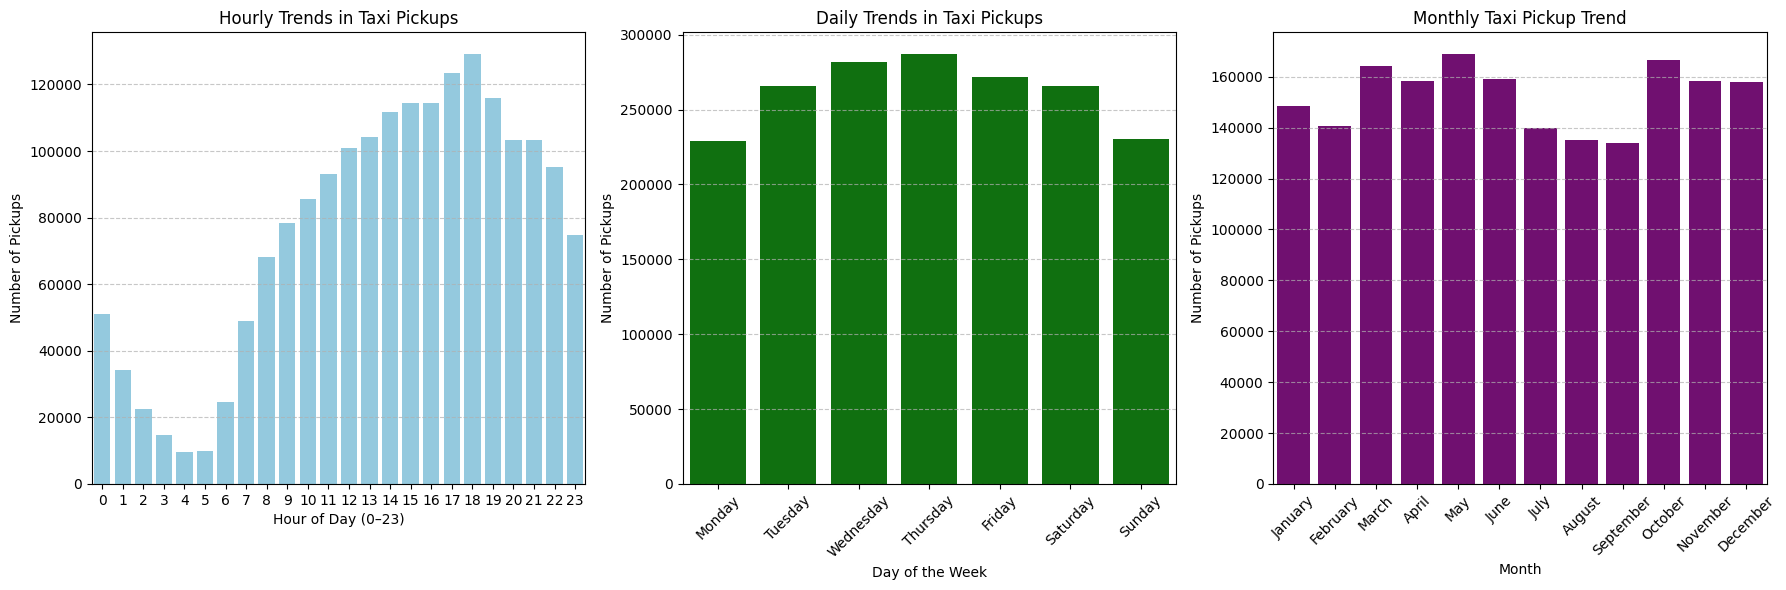

In [264]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Plot bar chart in the first subplot - hourly pickups
sns.barplot(x='pickup_hour', y='pickup_count', data=hourly_pickups, ax=axes[0], color='skyblue')
axes[0].set_title('Hourly Trends in Taxi Pickups')
axes[0].set_xlabel('Hour of Day (0–23)')
axes[0].set_ylabel('Number of Pickups')
axes[0].set_xticks(range(0, 24))
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
# Plot the Day wise
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x='day', y='pickup_count', data=daily_pickups, order=day_order, ax=axes[1], color='green')
axes[1].set_title('Daily Trends in Taxi Pickups')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Number of Pickups')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
# plot the month wise
sns.barplot(x='pickup_month', y='pickup_count', data=monthly_pickups, color = 'purple')
plt.title('Monthly Taxi Pickup Trend')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [266]:
# Analyse the above parameters

# Check if the columns has any missing values
df1_cleaned[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].isnull().sum()

fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64

In [268]:
# Check if the columns has any negative 
print("***Negative values***")
(df1_cleaned[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']]< 0).sum()

***Negative values***


fare_amount      1313977
tip_amount       1171233
total_amount     1321713
trip_distance    1399378
dtype: int64

In [270]:
df1_cleaned.shape

(1831445, 25)

In [272]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1831445 entries, 0 to 1831444
Data columns (total 25 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  date                   object        
 18  hour                  

In [282]:
#df1_cleaned[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']]<= 0

fare_amount  tip_amount  total_amount  trip_distance
0               True        True          True           True
1              False       False         False          False
2              False       False         False          False
3               True        True          True           True
4              False       False         False          False
...              ...         ...           ...            ...
1831440         True       False          True           True
1831441         True        True          True           True
1831442        False       False         False          False
1831443         True       False         False          False
1831444        False        True         False          False

[1831445 rows x 4 columns]

In [358]:
print("***Zero Values***")
(df1_cleaned[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']]== 0).sum()

***Zero Values***


fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64

In [360]:
cols_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Drop rows where any of the specified columns have negative values
df4_cleaned = df1_cleaned[(df1_cleaned[cols_to_check] >= 0).all(axis=1)]

In [362]:
df4_cleaned = df4_cleaned.reset_index(drop = True)

In [364]:
df4_cleaned.shape

(282410, 25)

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [ ]:
# We dont have any Zero Values for the columns: fare_amount, tip_amount, total_amount, and also trip_distance

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [368]:
# Create a df with non zero entries for the selected parameters.

cols_to_check = ['fare_amount', 'tip_amount', 'total_amount','trip_distance']

# Keep rows where all specified columns are non-zero
df4_cleaned = df4_cleaned[(df4_cleaned[cols_to_check] != 0).all(axis=1)].copy()

In [370]:
df4_cleaned = df4_cleaned.reset_index(drop=True)

In [372]:
df4_cleaned.shape

(282410, 25)

In [374]:
cols_to_check = ['fare_amount', 'tip_amount', 'total_amount','trip_distance']

# Keep rows where all specified columns are non-zero
df5_cleaned = df4_cleaned[(df4_cleaned[cols_to_check] != 0).all(axis=1)].copy()

In [376]:
df5_cleaned = df5_cleaned.reset_index(drop=True)

In [378]:
df5_cleaned.shape

(282410, 25)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [380]:
# Group data by month and analyse monthly revenue
# Step 1: Extract year-month for grouping
df4_cleaned['pickup_month_new1'] = df4_cleaned['tpep_pickup_datetime'].dt.to_period('M').astype(str)

# Step 2: Group by month and calculate total revenue
monthly_revenue = df4_cleaned.groupby('pickup_month_new1')['total_amount'].sum().reset_index()

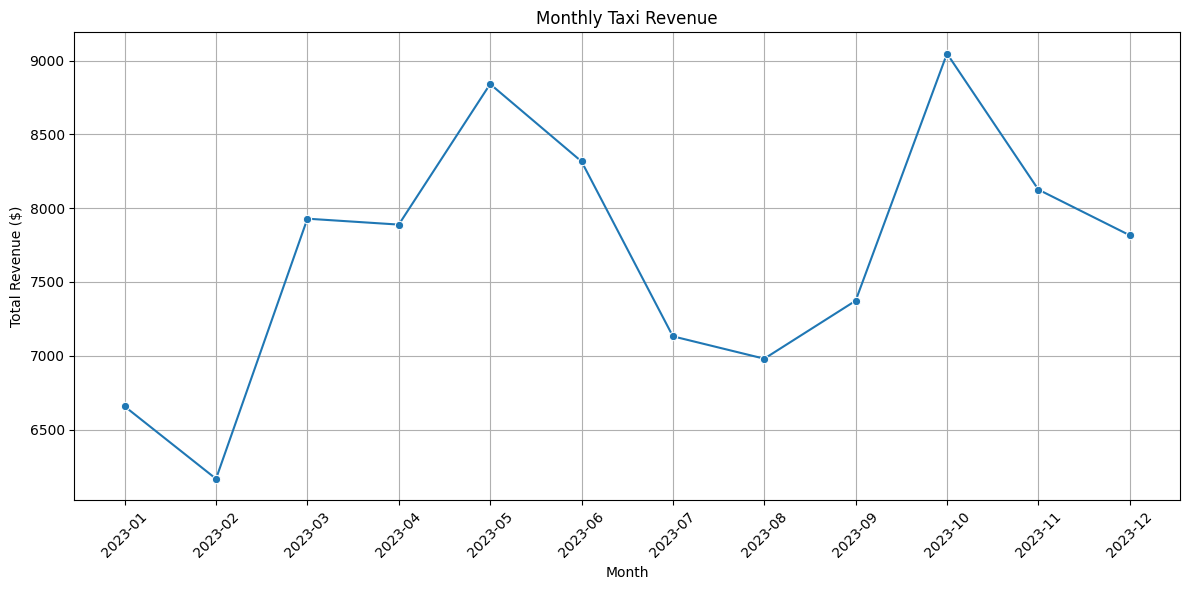

In [382]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_month_new1', y='total_amount', data=monthly_revenue, marker='o')
plt.title('Monthly Taxi Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [384]:
df4_cleaned.shape

(282410, 26)

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [386]:
# Calculate proportion of each quarter

# 1. Extract quarter from datetime
df4_cleaned['quarter'] = df4_cleaned['tpep_pickup_datetime'].dt.to_period('Q')

# 2. Calculate count of records per quarter
quarter_counts = df4_cleaned['quarter'].value_counts().sort_index()

# 3. Calculate proportions (as fractions or percentages)
quarter_proportions = quarter_counts / quarter_counts.sum()

# 4. Convert to percentage
quarter_percentage = quarter_proportions * 100

# Display
print("Proportion per quarter:\n", quarter_proportions)
print("\nPercentage per quarter:\n", quarter_percentage.round(2))


Proportion per quarter:
 quarter
2023Q1    0.236769
2023Q2    0.271761
2023Q3    0.227095
2023Q4    0.264374
Freq: Q-DEC, Name: count, dtype: float64

Percentage per quarter:
 quarter
2023Q1    23.68
2023Q2    27.18
2023Q3    22.71
2023Q4    26.44
Freq: Q-DEC, Name: count, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [388]:
# Show how trip fare is affected by distance
df_filtered = pd.DataFrame()
df_filtered = df4_cleaned[df4_cleaned['trip_distance'] > 0]

In [390]:
df_filtered.shape

(282410, 27)

In [392]:
df_filtered = df_filtered.reset_index(drop=True)

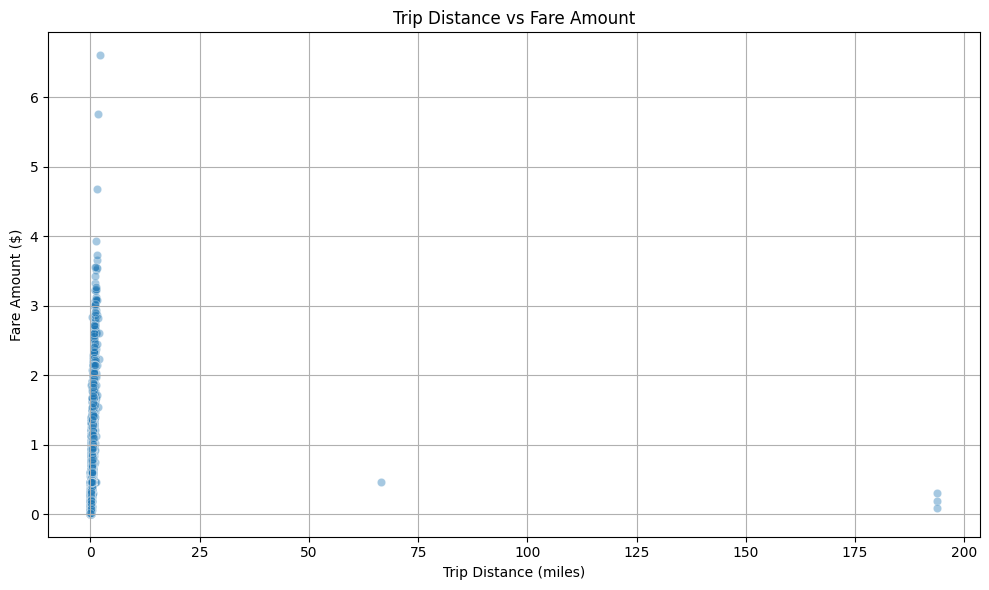

In [394]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='trip_distance', y='fare_amount', alpha=0.4)

plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [396]:
correlation = df_filtered['trip_distance'].corr(df_filtered['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.4f}")

Correlation between trip_distance and fare_amount: 0.1641


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [398]:
# Show relationship between fare and trip duration

# Create a new column for duration in minutes
df_filtered['trip_duration_317'] = (df_filtered['tpep_dropoff_datetime'] - df_filtered['tpep_pickup_datetime']).dt.total_seconds() / 60

df_duration_fare = df_filtered[
    (df_filtered['trip_duration_317'] > 0) & 
    (df_filtered['trip_duration_317'] < 300)
]


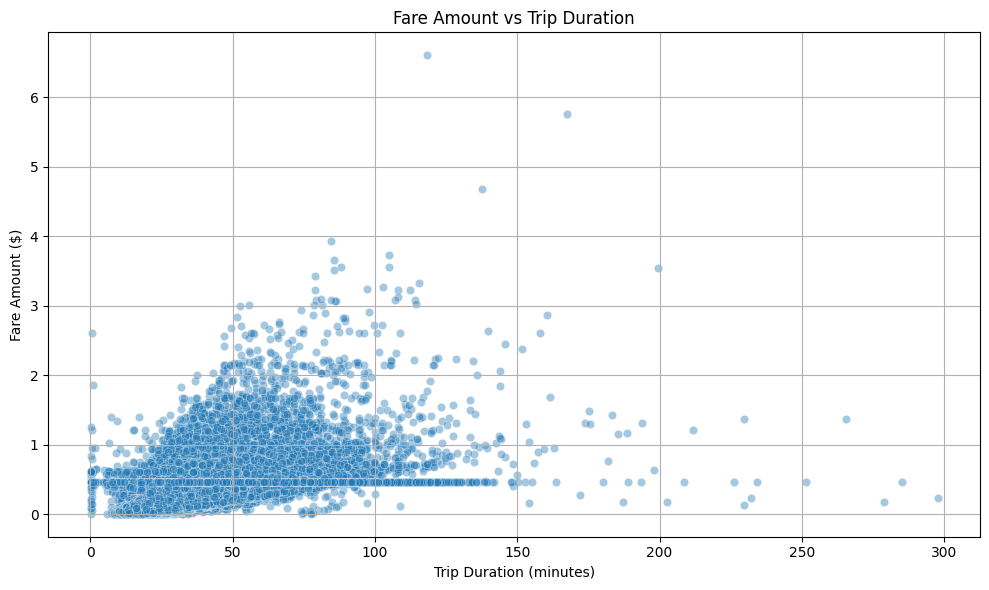

In [400]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_duration_fare, x='trip_duration_317', y='fare_amount', alpha=0.4)

plt.title('Fare Amount vs Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [404]:
correlation = df_duration_fare['trip_duration_317'].corr(df_duration_fare['fare_amount'])
print(f'Correlation between trip duration and fare amount: {correlation:.4f}')

Correlation between trip duration and fare amount: 0.6857


In [406]:
# Show relationship between fare and number of passengers

df_filtered_1 = df4_cleaned[
    (df4_cleaned['passenger_count'] > 0) & 
    (df4_cleaned['passenger_count'] <= 6) &
    (df4_cleaned['fare_amount'] > 0) &
    (df4_cleaned['fare_amount'] < 300)  
]

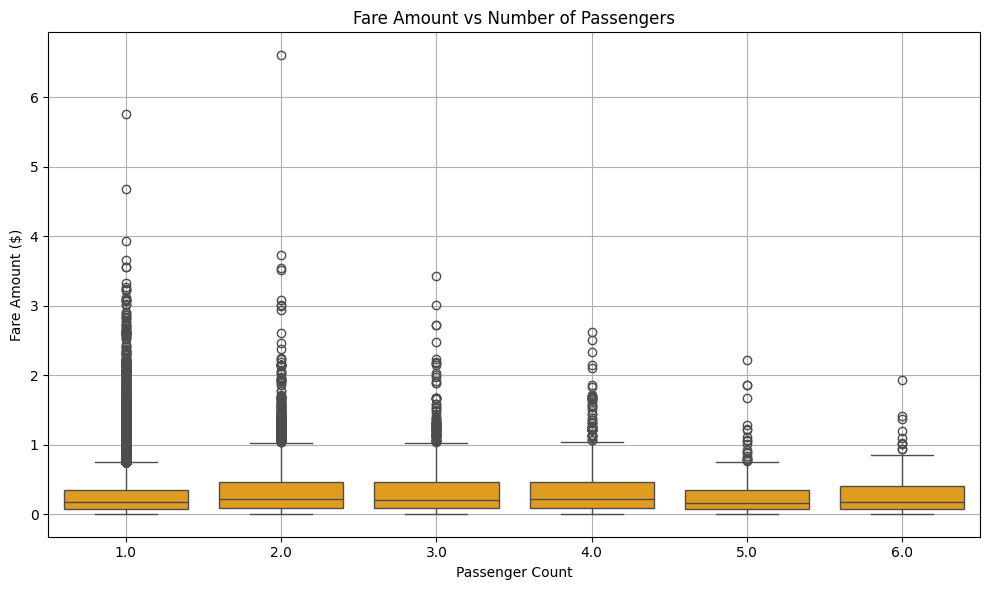

In [408]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered_1, x='passenger_count', y='fare_amount', color='orange')

plt.title('Fare Amount vs Number of Passengers')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [410]:
correlation = df_filtered_1['fare_amount'].corr(df_filtered_1['passenger_count'])
print(f'Correlation between fare amount and passenger count: {correlation:.4f}')

Correlation between fare amount and passenger count: 0.0535


In [436]:
# Show relationship between tip and trip distance
df_tip = pd.DataFrame
df_tip = df1_cleaned[df1_cleaned['trip_distance'] > 0]

In [438]:
df_tip.shape

(432067, 25)

In [440]:
df_tip = df_tip.reset_index(drop=True)

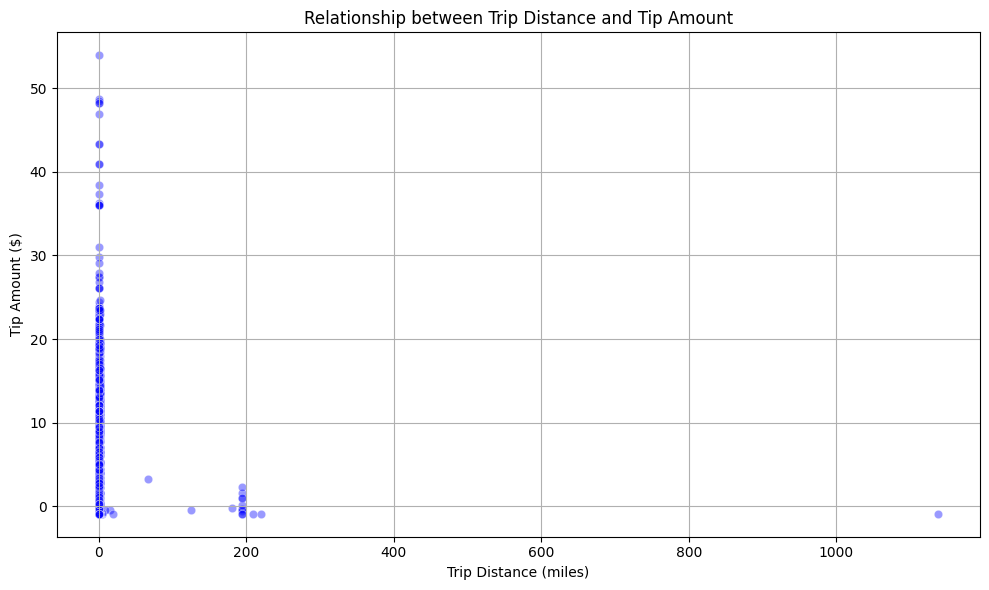

In [446]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1_cleaned, x='trip_distance', y='tip_amount', alpha=0.4, color='blue')

plt.title('Relationship between Trip Distance and Tip Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

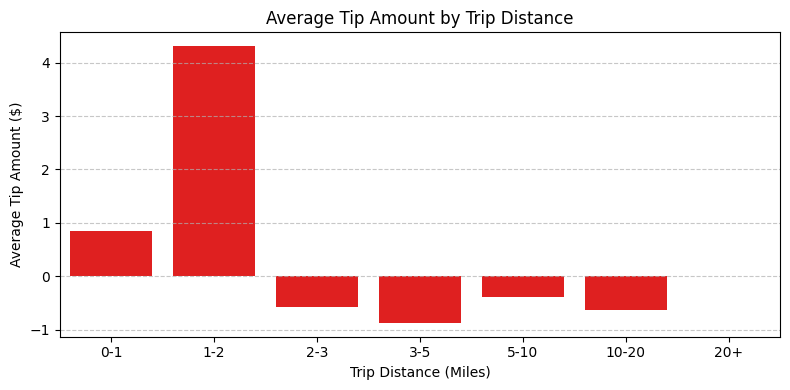

In [448]:
# STEP 1: Bin trip distances into ranges
bins = [0, 1, 2, 3, 5, 10, 20, 50]
labels = ['0-1', '1-2', '2-3', '3-5', '5-10', '10-20', '20+']
df_tip['distance_bin'] = pd.cut(df_tip['trip_distance'], bins=bins, labels=labels, right=False)

# STEP 2: Calculate average tip amount per bin
avg_tip_by_bin = df_tip.groupby('distance_bin')['tip_amount'].mean().reset_index()

# STEP 3: Plot barplot
plt.figure(figsize=(8, 4))
sns.barplot(data=avg_tip_by_bin, x='distance_bin', y='tip_amount', color='Red')

plt.title('Average Tip Amount by Trip Distance')
plt.xlabel('Trip Distance (Miles)')
plt.ylabel('Average Tip Amount ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [454]:
correlation = df_tip['tip_amount'].corr(df_tip['trip_distance'])
print(f'Correlation between tip amount and trip distance: {correlation:.4f}')

Correlation between tip amount and trip distance: 0.0212


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [456]:
# Analyse the distribution of different payment types (payment_type).

payment_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

df1_cleaned['payment_type_desc'] = df1_cleaned['payment_type'].map(payment_mapping)


In [458]:
payment_counts = df1_cleaned['payment_type_desc'].value_counts()
print(payment_counts)

payment_type_desc
Credit Card    1492338
Cash            316420
Dispute          13677
No Charge         9010
Name: count, dtype: int64


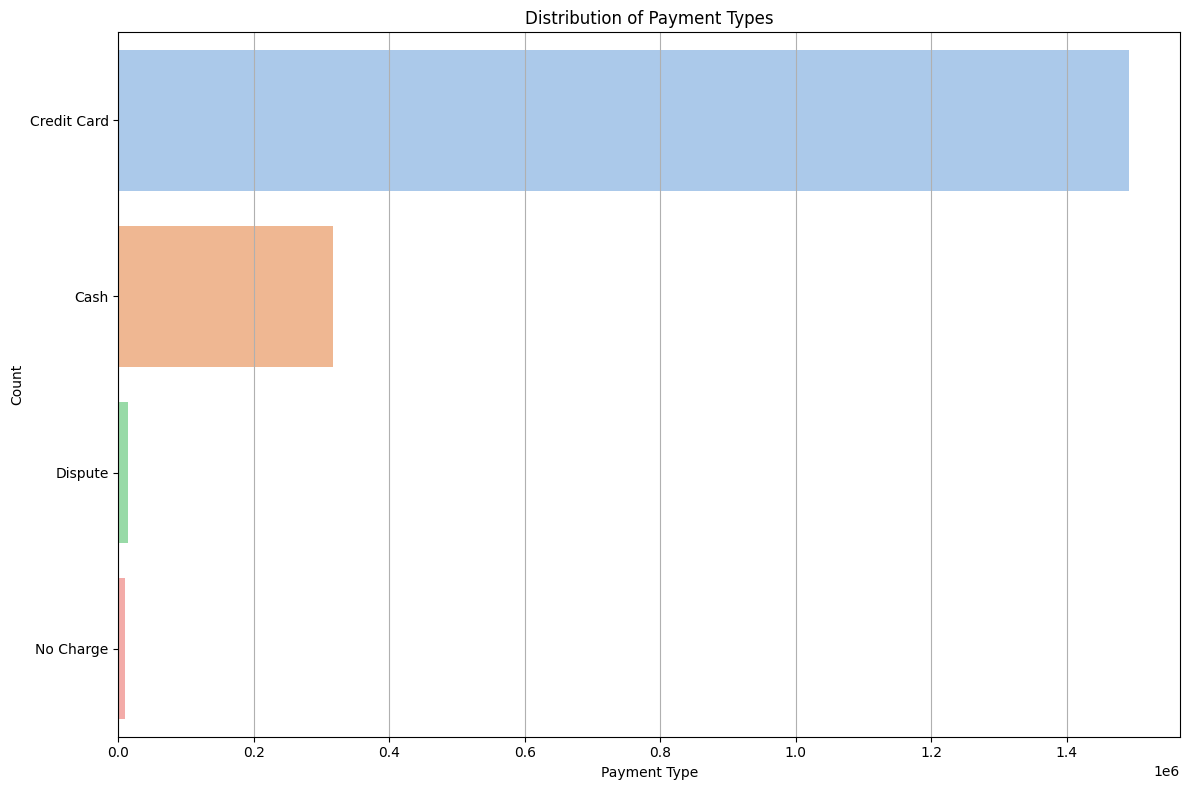

In [462]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df1_cleaned, y='payment_type_desc', order=payment_counts.index, palette='pastel')
plt.title('Distribution of Payment Types')
plt.ylabel('Count')
plt.xlabel('Payment Type')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [464]:
 !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [468]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("E:\\AI_ML\\Exploratory Data Analysis\\Jul 21 2025 EDA\\taxi_zones\\taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

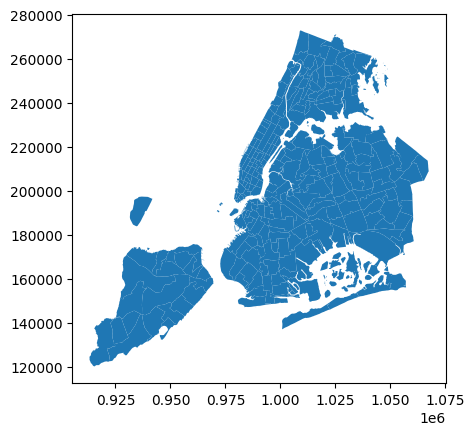

In [470]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [472]:
# Merge zones and trip records using locationID and PULocationID

df_trips = pd.DataFrame()
df_zones = pd.DataFrame()
df_trips = pd.read_parquet("E:\\AI_ML\\Exploratory Data Analysis\\Jul 21 2025 EDA\\trip_records\\2023_combined_data.parquet")
df_zones = gpd.read_file("E:\\AI_ML\\Exploratory Data Analysis\\Jul 21 2025 EDA\\\\taxi_zones\\taxi_zones.shp")

df_merged = pd.DataFrame()
# Merge on Pickup Location
df_merged = pd.merge(df_trips, df_zones,
                     how='left',
                     left_on='PULocationID',
                     right_on='LocationID')

# Rename columns for clarity
df_merged = df_merged.rename(columns={
    'borough': 'PU_Borough',
    'zone': 'PU_Zone',
    'service_zone': 'PU_Service_Zone'
})

# Drop duplicate LocationID column
df_merged.drop(columns=['LocationID'], inplace=True)

# Merge on Dropoff Location ID
df_merged = pd.merge(df_merged, df_zones,
                     how='left',
                     left_on='DOLocationID',
                     right_on='LocationID')

df_merged = df_merged.rename(columns={
    'borough': 'DO_Borough',
    'zone': 'DO_Zone',
    'service_zone': 'DO_Service_Zone'
})

df_merged.drop(columns=['LocationID'], inplace=True)

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [474]:
# Group data by location and calculate the number of trips
# Group data by location and calculate the number of trips
# Count trips per Pickup Location ID
pickup_location_counts = df_trips.groupby('PULocationID').size().reset_index(name='Total_Trips')

# Sort in descending order
pickup_location_counts = pickup_location_counts.sort_values(by='Total_Trips', ascending=False)

# Count trips per Dropoff Location ID
dropoff_location_counts = df_trips.groupby('DOLocationID').size().reset_index(name='Total_Trips')

# Sort in descending order
dropoff_location_counts = dropoff_location_counts.sort_values(by='Total_Trips', ascending=False)

# Merge pickup counts with zone names
pickup_with_zone = pd.merge(pickup_location_counts, df_zones,
                            how='left', left_on='PULocationID', right_on='LocationID')

# Select useful columns
pickup_with_zone = pickup_with_zone[['PULocationID', 'zone', 'borough', 'Total_Trips']]



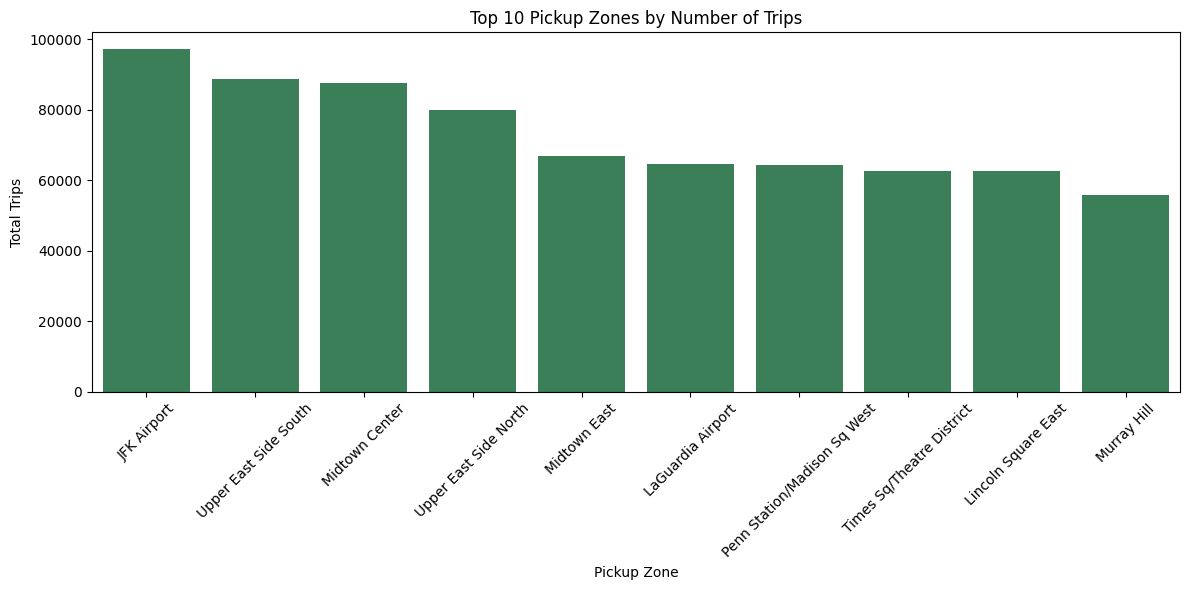

In [476]:
top10_pickups = pickup_with_zone.head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10_pickups, x='zone', y='Total_Trips', color = 'seagreen')
plt.title('Top 10 Pickup Zones by Number of Trips')
plt.xticks(rotation=45)
plt.ylabel('Total Trips')
plt.xlabel('Pickup Zone')
plt.tight_layout()
plt.show()

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [484]:
# Merge trip counts back to the zones GeoDataFrame
trip_counts = pd.DataFrame()
gdf_zones_trips = pd.DataFrame()

trip_counts = df_trips.groupby('PULocationID').size().reset_index(name='Total_Trips')

gdf_zones_trips = df_zones.merge(trip_counts, how='left',
                                  left_on='LocationID', right_on='PULocationID')

gdf_zones_trips['Total_Trips'].fillna(0, inplace=True)

# Ensure geometry column is active
gdf_zones_trips = gdf_zones_trips.set_geometry('geometry')

# Set CRS if not already set (WGS84)
if gdf_zones_trips.crs is None:
    gdf_zones_trips.set_crs(epsg=4326, inplace=True)

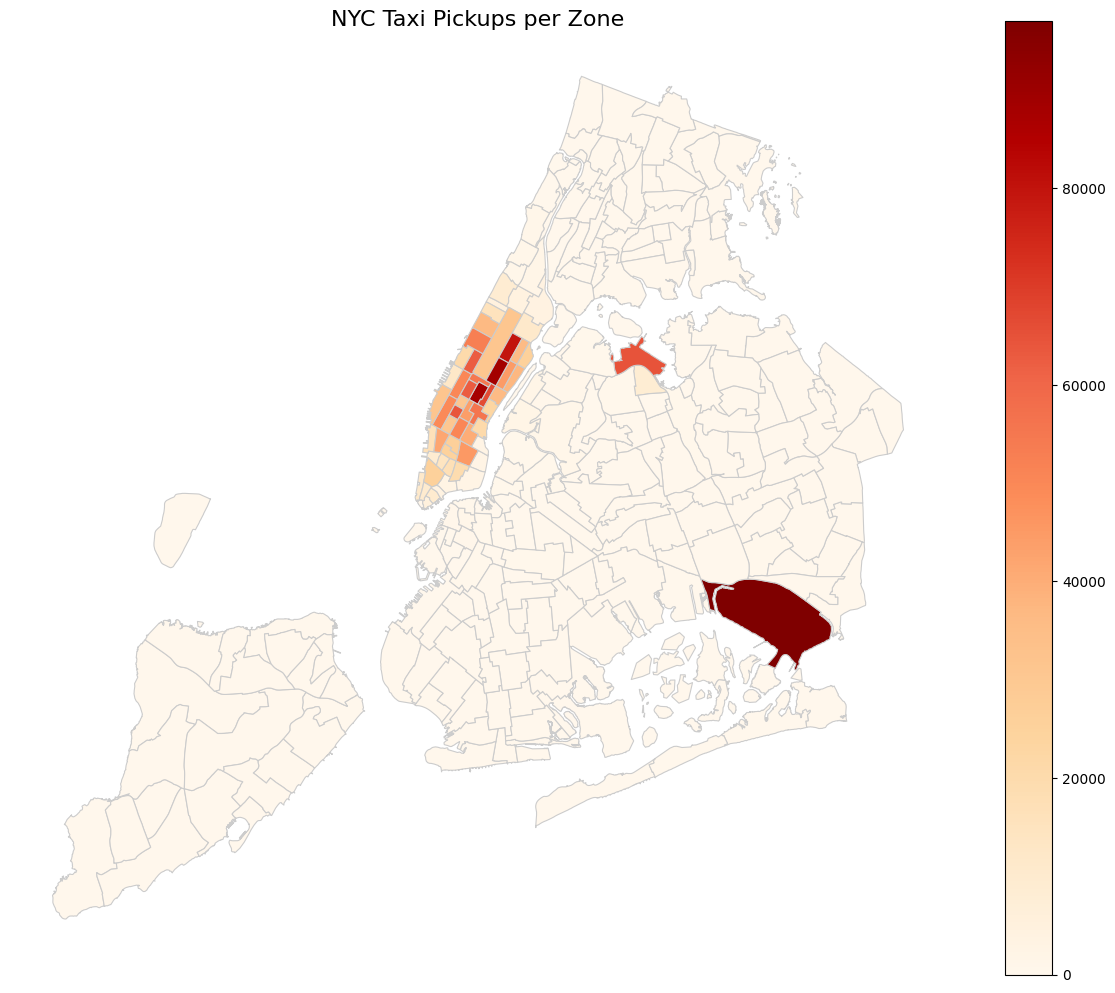

In [486]:
fig, ax = plt.subplots(figsize=(12, 10))
gdf_zones_trips.plot(column='Total_Trips', cmap='OrRd', linewidth=0.8,
                     ax=ax, edgecolor='0.8', legend=True)

ax.set_title("NYC Taxi Pickups per Zone", fontsize=16)
ax.axis('off')
plt.tight_layout()
plt.show()

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<Axes: >

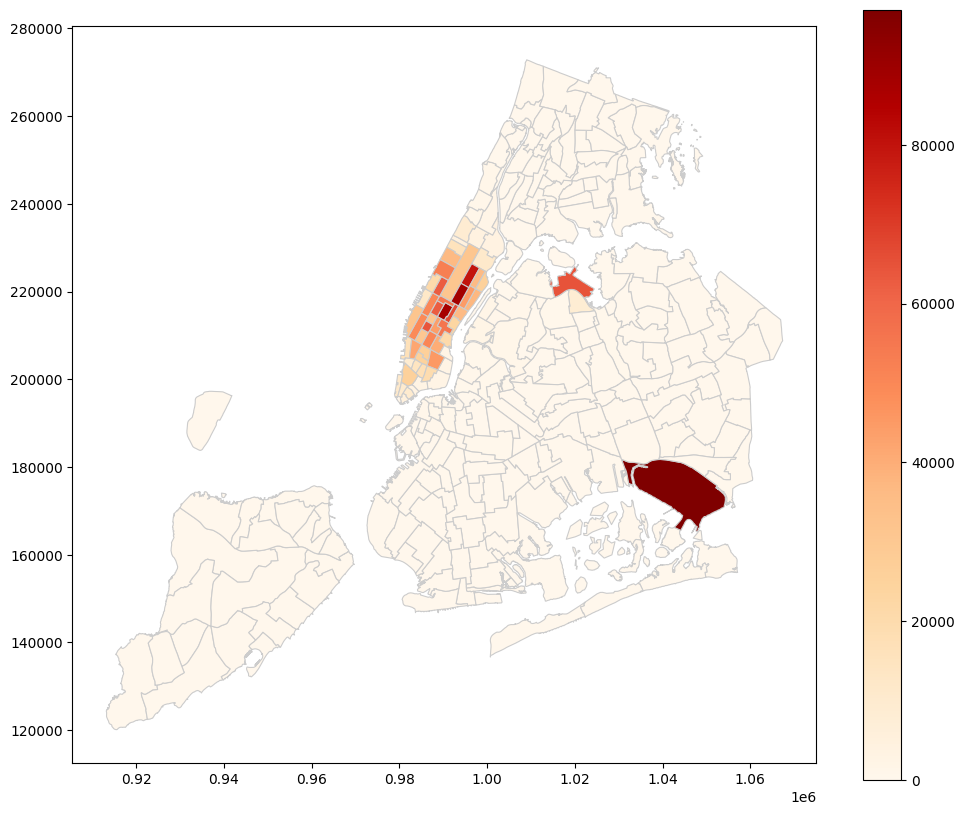

In [488]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map and display it
gdf_zones_trips.plot(
    column='Total_Trips',         # Column to base the color shading on
    cmap='OrRd',                  # Color palette ('OrRd' = Orange-Red)
    linewidth=0.8,                # Border line width
    ax=ax,                        # Plot on the defined axis
    edgecolor='0.8',              # Light gray borders between zones
    legend=True                   # Add a color bar legend
)

In [490]:
# can you try displaying the zones DF sorted by the number of trips?
# Sort the GeoDataFrame by the Total_Trips column in descending order
sorted_zones = gdf_zones_trips.sort_values(by='Total_Trips', ascending=False)

# Display the top 10 zones with the most trips
sorted_zones[['LocationID', 'zone', 'borough', 'Total_Trips']].head(10)

LocationID                          zone    borough  Total_Trips
131         132                   JFK Airport     Queens      97047.0
236         237         Upper East Side South  Manhattan      88610.0
160         161                Midtown Center  Manhattan      87590.0
235         236         Upper East Side North  Manhattan      79756.0
161         162                  Midtown East  Manhattan      66712.0
137         138             LaGuardia Airport     Queens      64449.0
185         186  Penn Station/Madison Sq West  Manhattan      64318.0
229         230     Times Sq/Theatre District  Manhattan      62672.0
141         142           Lincoln Square East  Manhattan      62664.0
169         170                   Murray Hill  Manhattan      55933.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [494]:
# Find routes which have the slowest speeds at different times of the day
df1_cleaned['pickup_datetime'] = pd.to_datetime(df1_cleaned['tpep_pickup_datetime'])
df1_cleaned['dropoff_datetime'] = pd.to_datetime(df1_cleaned['tpep_dropoff_datetime'])

# Duration in hours
df1_cleaned['trip_duration_hours'] = (df1_cleaned['dropoff_datetime'] - df1_cleaned['pickup_datetime']).dt.total_seconds() / 3600
# Avoid division by zero or negative durations
df1_cleaned = df1_cleaned[(df1_cleaned['trip_duration_hours'] > 0) & (df1_cleaned['trip_distance'] > 0)]

df1_cleaned['speed_mph'] = df1_cleaned['trip_distance'] / df1_cleaned['trip_duration_hours']
df1_cleaned['hour_of_day'] = df1_cleaned['pickup_datetime'].dt.hour


# Define route as Pickup-Dropoff pair
df1_cleaned['route'] = df1_cleaned['PULocationID'].astype(str) + '-' + df1_cleaned['DOLocationID'].astype(str)

# Group by route and hour
route_hour_speed = df1_cleaned.groupby(['route', 'hour_of_day'])['speed_mph'].mean().reset_index()

# For each hour, find the slowest route (lowest average speed)
slowest_routes = route_hour_speed.loc[route_hour_speed.groupby('hour_of_day')['speed_mph'].idxmin()]

# Sort by hour if needed
slowest_routes.sort_values('hour_of_day', inplace=True)


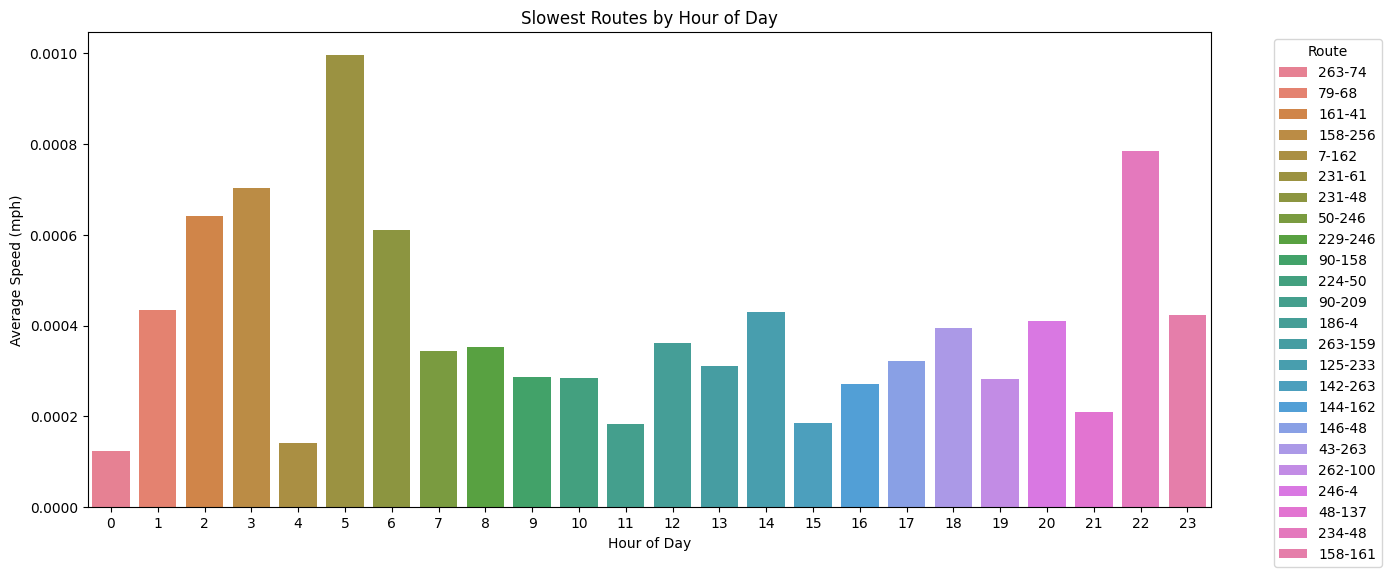

In [495]:
plt.figure(figsize=(14,6))
sns.barplot(data=slowest_routes, x='hour_of_day', y='speed_mph', hue='route', dodge=False)
plt.title("Slowest Routes by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Speed (mph)")
plt.legend(title='Route', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

How does identifying high-traffic, high-demand routes help us?

In [ ]:
#Deploy more drivers to areas/routes where demand is consistently high.
#Reduces wait times for passengers and idle time for drivers.
#Apply surge pricing or promotions on popular routes to maximize revenue or balance demand.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest Hour: 22:00 with 26973 trips.


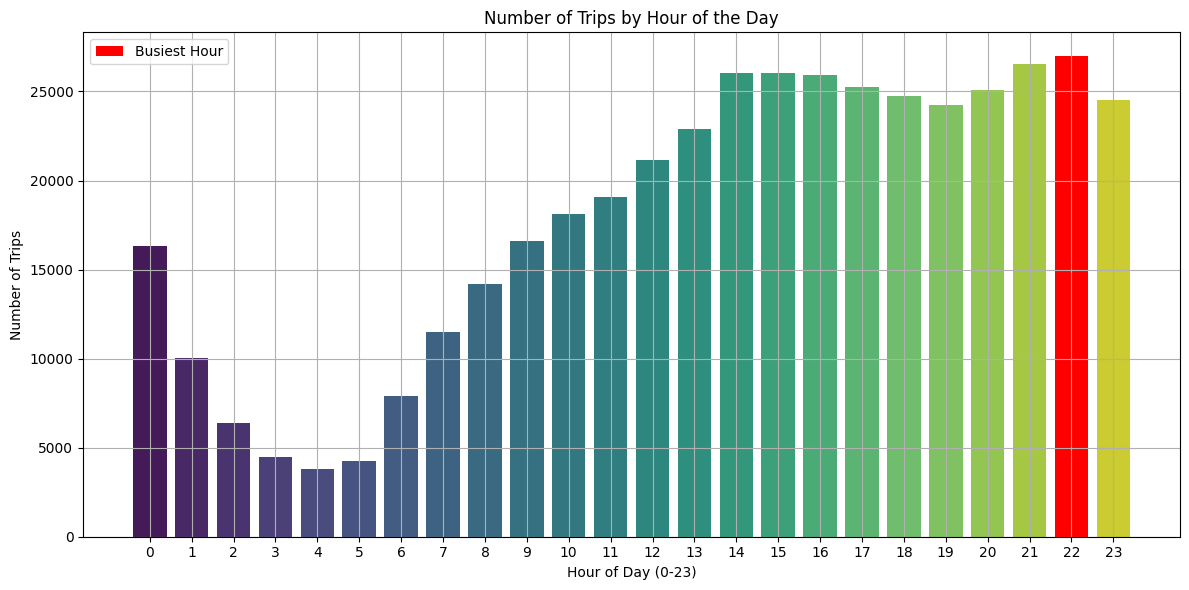

In [498]:
# Visualise the number of trips per hour and find the busiest hour

# Visualise the number of trips per hour and find the busiest hour

# Step 1: Extract hour from pickup datetime
df1_cleaned['pickup_hour1'] = df1_cleaned['tpep_pickup_datetime'].dt.hour

# Step 2: Calculate number of trips per hour
trips_per_hour = df1_cleaned.groupby('pickup_hour1').size().reset_index(name='num_trips')

# Step 3: Find the busiest hour
busiest_row = trips_per_hour.loc[trips_per_hour['num_trips'].idxmax()]
busiest_hour = busiest_row['pickup_hour1']
busiest_hour_trips = busiest_row['num_trips']

print(f"Busiest Hour: {busiest_hour}:00 with {busiest_hour_trips} trips.")

# Step 4: Visualize using bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=trips_per_hour, x='pickup_hour1', y='num_trips', palette='viridis')

# Highlight the busiest hour
plt.bar(busiest_hour, busiest_hour_trips, color='red', label='Busiest Hour')

plt.title('Number of Trips by Hour of the Day')
plt.xlabel('Hour of Day (0-23)')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [502]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sampling_fraction = 0.05

# Count number of trips in each hour from sampled data
hourly_counts_s1 = df1_cleaned['hour'].value_counts().sort_values(ascending=False)

# Get top 5 busiest hours
top5_hours_s1 = hourly_counts_s1.head(5)

# Scale up to estimate actual trip counts
top5_hours_actual1 = (top5_hours_s1 / sampling_fraction).astype(int)

# Display results
print("Top 5 Busiest Hours (Estimated Actual Trip Counts):")
print(top5_hours_actual1.sort_index())



Top 5 Busiest Hours (Estimated Actual Trip Counts):
hour
14    521040
15    520520
16    518280
21    530340
22    539460
Name: count, dtype: int32


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

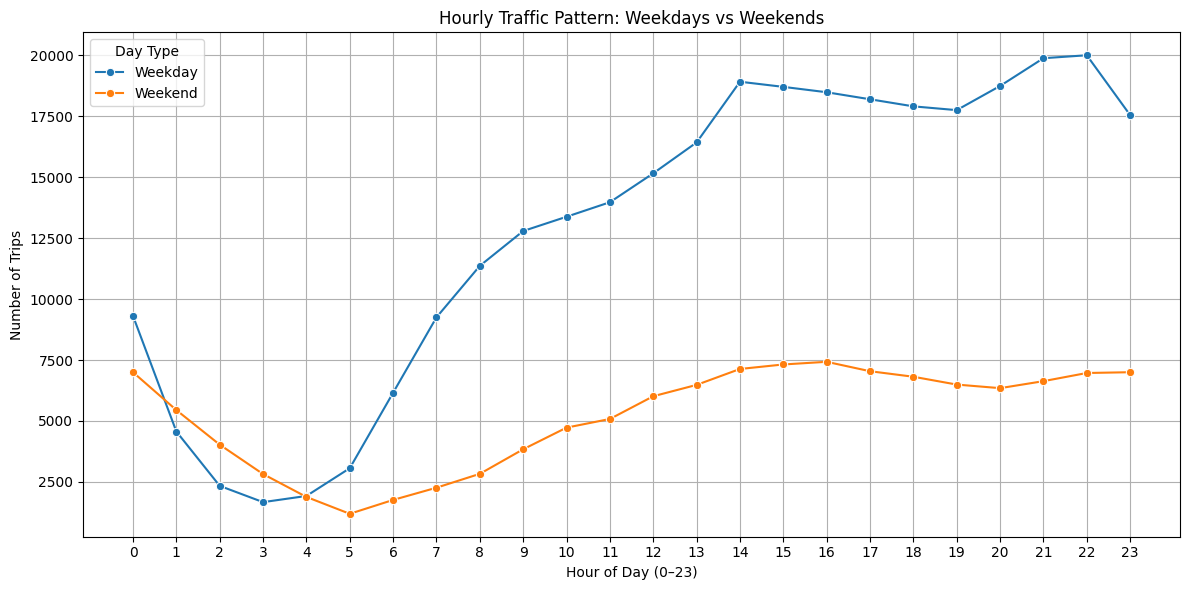

In [506]:
# Compare traffic trends for the week days and weekends
# Extract hour and weekday from pickup datetime
df1_cleaned['pickup_hour'] = df1_cleaned['tpep_pickup_datetime'].dt.hour
df1_cleaned['weekday'] = df1_cleaned['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

# Add a new column for Weekday vs Weekend
df1_cleaned['day_type'] = df1_cleaned['weekday'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by hour and day_type
hourly_traffic = df1_cleaned.groupby(['pickup_hour', 'day_type']).size().reset_index(name='num_trips')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_traffic, x='pickup_hour', y='num_trips', hue='day_type', marker='o')

plt.title('Hourly Traffic Pattern: Weekdays vs Weekends')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Trips')
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

In [ ]:
# Both the weekend and weekday almost are of the same pattern

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

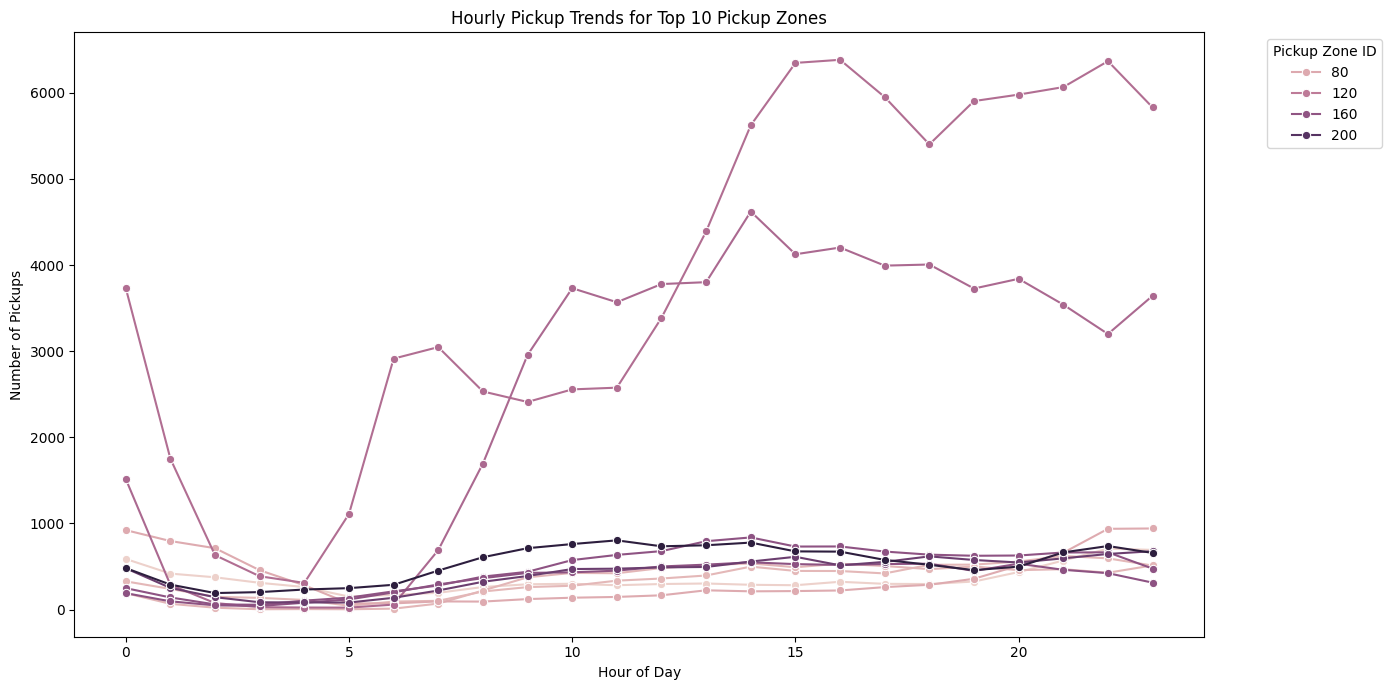

In [508]:
# Find top 10 pickup and dropoff zones
# Extract pickup hour
df1_cleaned['pickup_hour'] = df1_cleaned['tpep_pickup_datetime'].dt.hour
df1_cleaned['dropoff_hour'] = df1_cleaned['tpep_dropoff_datetime'].dt.hour

# Count pickups by zone
top_pickup_zones = df1_cleaned.groupby('PULocationID').size().sort_values(ascending=False).head(10).index

# Filter data for only top 10 pickup zones
df_top_pickups = df1_cleaned[df1_cleaned['PULocationID'].isin(top_pickup_zones)]

top_dropoff_zones = df1_cleaned.groupby('DOLocationID').size().sort_values(ascending=False).head(10).index

# Filter data for only top 10 dropoff zones
df_top_dropoffs = df1_cleaned[df1_cleaned['DOLocationID'].isin(top_dropoff_zones)]

# Group and count pickups
pickup_trends = df_top_pickups.groupby(['PULocationID', 'pickup_hour']).size().reset_index(name='pickup_count')

plt.figure(figsize=(14, 7))
sns.lineplot(data=pickup_trends, x='pickup_hour', y='pickup_count', hue='PULocationID', marker='o')
plt.title('Hourly Pickup Trends for Top 10 Pickup Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.legend(title='Pickup Zone ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [512]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_counts = df1_cleaned.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_counts = df1_cleaned.groupby('DOLocationID').size().reset_index(name='dropoff_count')

pickup_dropoff = pd.merge(
    pickup_counts, 
    dropoff_counts, 
    left_on='PULocationID', 
    right_on='DOLocationID', 
    how='outer'
).fillna(0)

# Choose a unified LocationID column
pickup_dropoff['LocationID'] = pickup_dropoff['PULocationID'].combine_first(pickup_dropoff['DOLocationID'])

pickup_dropoff['pickup_dropoff_ratio'] = pickup_dropoff['pickup_count'] / (pickup_dropoff['dropoff_count'] + 1e-5)  # Avoid division by zero

# Top 10 zones with highest pickup/dropoff ratio
top10_ratio = pickup_dropoff.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)

# Bottom 10 zones with lowest pickup/dropoff ratio
bottom10_ratio = pickup_dropoff.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)

# Display both
print("Top 10 zones by Pickup/Dropoff Ratio:")
print(top10_ratio[['LocationID', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

print("\nBottom 10 zones by Pickup/Dropoff Ratio:")
print(bottom10_ratio[['LocationID', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

Top 10 zones by Pickup/Dropoff Ratio:
     LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
194       199.0           2.0            0.0         200000.000000
69         70.0        7723.0          475.0             16.258947
127       132.0       91605.0        17395.0              5.266168
133       138.0       61147.0        21103.0              2.897550
181       186.0       10028.0         3742.0              2.679850
244       249.0        7234.0         3250.0              2.225846
109       114.0        4589.0         2410.0              1.904149
229       234.0        6315.0         3987.0              1.583898
42         43.0        3719.0         2414.0              1.540597
156       161.0       11418.0         7428.0              1.537157

Bottom 10 zones by Pickup/Dropoff Ratio:
     LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
240         0.0           0.0           30.0              0.000000
216         0.0           0.0           32.0     

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [514]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

#df1_cleaned['pickup_hour'] = df0['tpep_pickup_datetime'].dt.hour
night_df = df1_cleaned[(df1_cleaned['pickup_hour'] >= 23) | (df1_cleaned['pickup_hour'] < 6)]
top_night_pickups = night_df['PULocationID'].value_counts().head(10)
print("Top 10 Pickup Zones (11PM–5AM):\n", top_night_pickups)
top_night_dropoffs = night_df['DOLocationID'].value_counts().head(10)
print("Top 10 Dropoff Zones (11PM–5AM):\n", top_night_dropoffs)
# Create a flag for night or day
df1_cleaned['time_of_day'] = df1_cleaned['pickup_hour'].apply(lambda x: 'night' if (x >= 23 or x < 6) else 'day')

# Group by time_of_day and sum revenue
revenue_by_time = df1_cleaned.groupby('time_of_day')['total_amount'].sum()

# Calculate share
revenue_share = (revenue_by_time / revenue_by_time.sum()) * 100
print("Revenue Share (%):\n", revenue_share)

Top 10 Pickup Zones (11PM–5AM):
 PULocationID
132    13757
138     5599
79      4185
249     3157
148     2832
48      2798
230     2307
114     2142
186     1804
68      1520
Name: count, dtype: int64
Top 10 Dropoff Zones (11PM–5AM):
 DOLocationID
263    2159
138    1683
239    1543
236    1526
238    1478
7      1392
265    1337
262    1331
132    1328
141    1327
Name: count, dtype: int64
Revenue Share (%):
 time_of_day
day      87.825063
night    12.174937
Name: total_amount, dtype: float64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Revenue Share by Time Period (%):
 time_period
Day      87.825063
Night    12.174937
Name: total_amount, dtype: float64


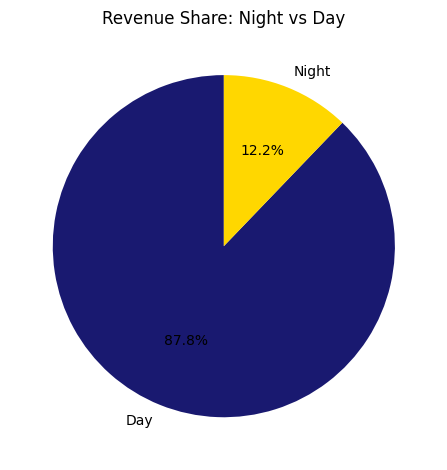

In [516]:
# Filter for night hours (11 PM to 5 AM)
df1_cleaned['time_period'] = df1_cleaned['pickup_hour'].apply(lambda x: 'Night' if (x >= 23 or x < 6) else 'Day')
revenue_by_period = df1_cleaned.groupby('time_period')['total_amount'].sum()
revenue_share = (revenue_by_period / revenue_by_period.sum()) * 100
print("Revenue Share by Time Period (%):\n", revenue_share)
revenue_share.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['midnightblue', 'gold'])
plt.title("Revenue Share: Night vs Day")
plt.ylabel('')
plt.tight_layout()
plt.show()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [518]:
# Analyse the fare per mile per passenger for different passenger counts

df_valid = pd.DataFrame()
df_valid= df1_cleaned[(df1_cleaned['trip_distance'] > 0) & (df1_cleaned['passenger_count'] > 0)]
df_valid['fare_per_mile_per_passenger'] = (
    df_valid['fare_amount'] / df_valid['trip_distance']
) / df_valid['passenger_count']
avg_fare_per_mile_per_passenger = df_valid.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().sort_index()
print(avg_fare_per_mile_per_passenger)


passenger_count
1.0    3.121785
2.0    1.576019
3.0    1.136408
4.0    0.937521
5.0    0.593922
6.0    0.520757
Name: fare_per_mile_per_passenger, dtype: float64


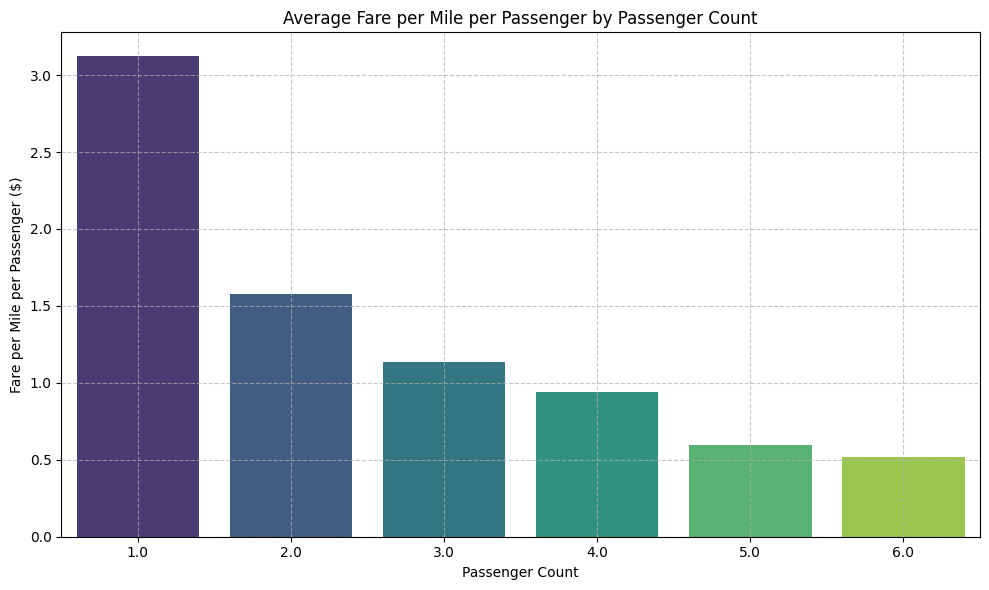

In [520]:
plt.figure(figsize=(10,6))
sns.barplot(x=avg_fare_per_mile_per_passenger.index, y=avg_fare_per_mile_per_passenger.values, palette='viridis')
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile per Passenger ($)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [522]:
# Compare the average fare per mile for different days and for different times of the day

df_valid = pd.DataFrame()
df_valid = df1_cleaned[(df1_cleaned['trip_distance'] > 0) & (df1_cleaned['fare_amount'] > 0)].copy()
df_valid['hour'] = df_valid['tpep_pickup_datetime'].dt.hour
df_valid['day_of_week'] = df_valid['tpep_pickup_datetime'].dt.day_name()
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']
hourly_avg_fare_per_mile = df_valid.groupby('hour')['fare_per_mile'].mean()
daily_avg_fare_per_mile = df_valid.groupby('day_of_week')['fare_per_mile'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])


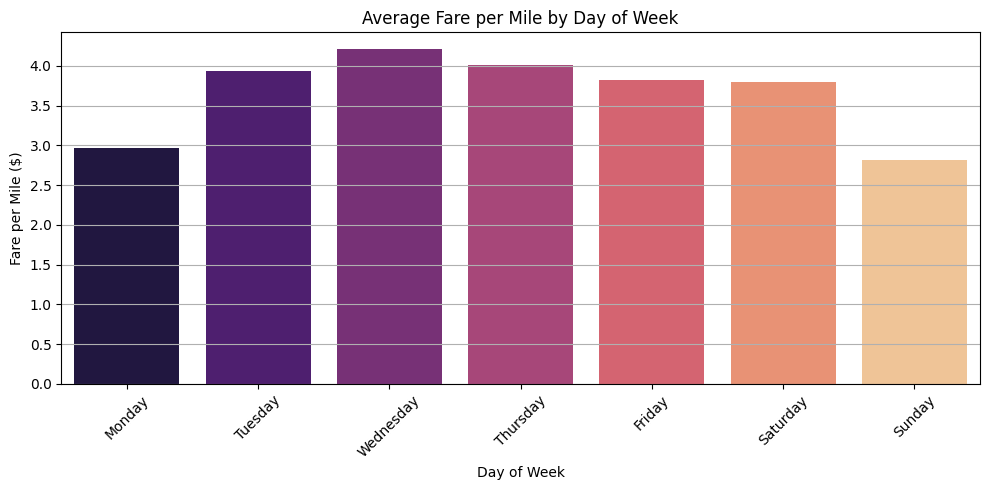

In [524]:
plt.figure(figsize=(10,5))
sns.barplot(x=daily_avg_fare_per_mile.index, y=daily_avg_fare_per_mile.values, palette='magma')
plt.title("Average Fare per Mile by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Fare per Mile ($)")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [526]:
# Compare fare per mile for different vendors

df_vendor = pd.DataFrame()
df1_cleaned['hour'] = df1_cleaned['tpep_pickup_datetime'].dt.hour
df1_cleaned['fare_per_mile'] = df1_cleaned['fare_amount'] / df1_cleaned['trip_distance']
vendor_hourly_fare = df1_cleaned.pivot_table(
    index='hour',
    columns='VendorID',
    values='fare_per_mile',
    aggfunc='mean'
)

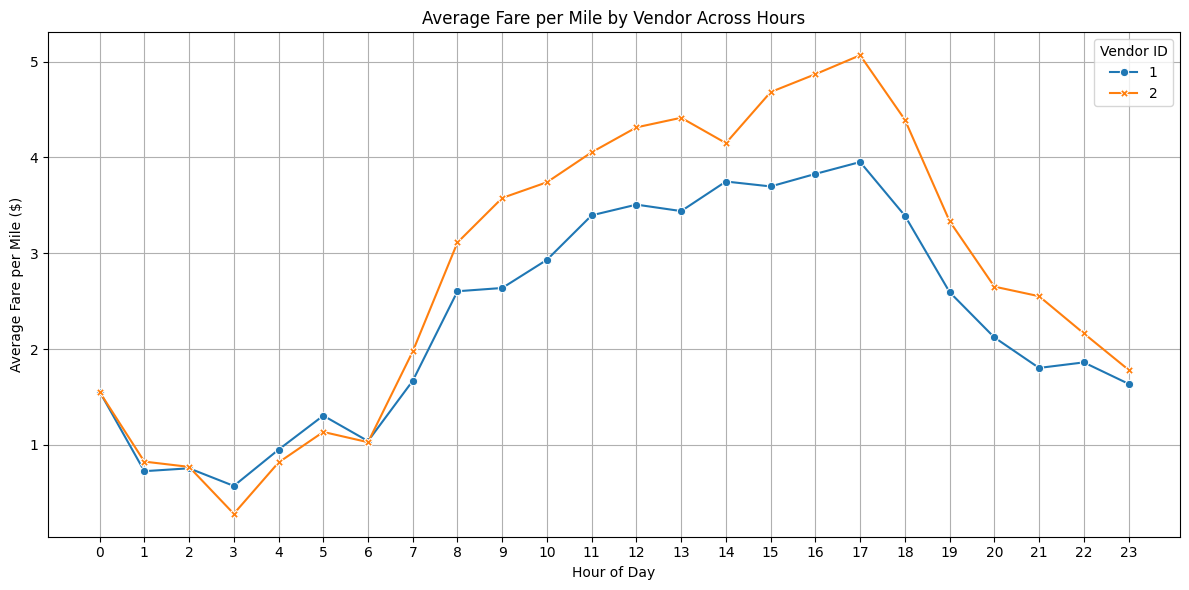

In [528]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=vendor_hourly_fare, markers=True, dashes=False)
plt.title("Average Fare per Mile by Vendor Across Hours")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare per Mile ($)")
plt.xticks(range(0, 24))
plt.grid(True)
plt.legend(title="Vendor ID")
plt.tight_layout()
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [530]:
# Defining distance tiers

df_fare_tier = pd.DataFrame()
df_fare_tier = df1_cleaned[(df1_cleaned['fare_amount'] > 0) & (df1_cleaned['trip_distance'] > 0)].copy()
df_fare_tier['distance_tier'] = pd.cut(
    df_fare_tier['trip_distance'],
    bins=[0, 2, 5, df_fare_tier['trip_distance'].max()],
    labels=['0-2 miles', '2-5 miles', '5+ miles']
)
df_fare_tier['fare_per_mile'] = df_fare_tier['fare_amount'] / df_fare_tier['trip_distance']
tiered_vendor_fares = df_fare_tier.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

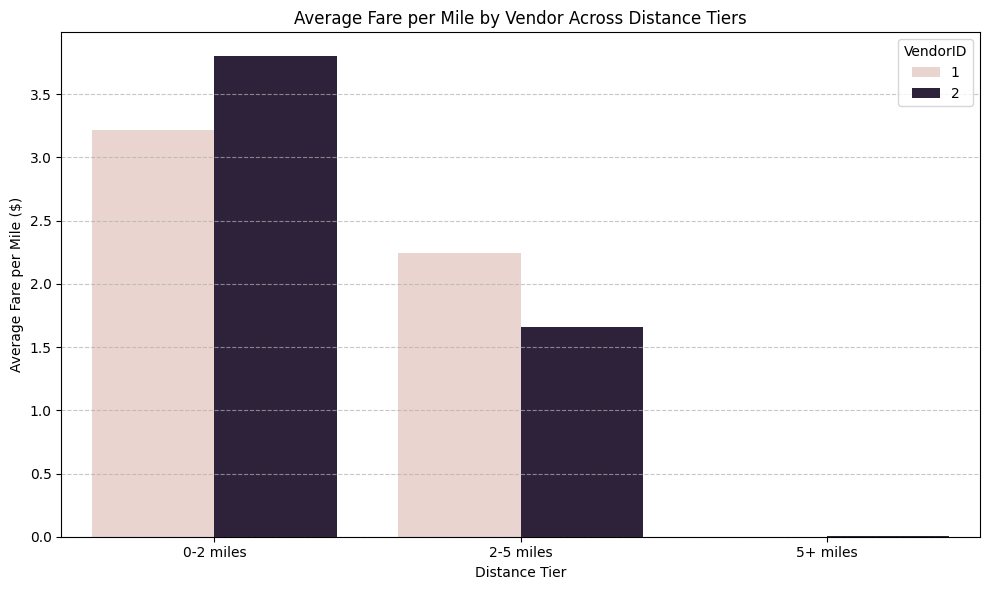

In [532]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tiered_vendor_fares, x='distance_tier', y='fare_per_mile', hue='VendorID')
plt.title('Average Fare per Mile by Vendor Across Distance Tiers')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [534]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df_tips = pd.DataFrame()
df_tips = df1_cleaned[(df1_cleaned['fare_amount'] > 0) & (df1_cleaned['tip_amount'] >= 0)].copy()
df_tips['tip_percentage'] = (df_tips['tip_amount'] / df_tips['fare_amount']) * 100
# Distance bands
df_tips['distance_band'] = pd.cut(
    df_tips['trip_distance'],
    bins=[0, 2, 5, 10, df_tips['trip_distance'].max()],
    labels=['0-2 mi', '2-5 mi', '5-10 mi', '10+ mi']
)

# Extract hour from pickup datetime
df_tips['pickup_hour'] = pd.to_datetime(df_tips['tpep_pickup_datetime']).dt.hour

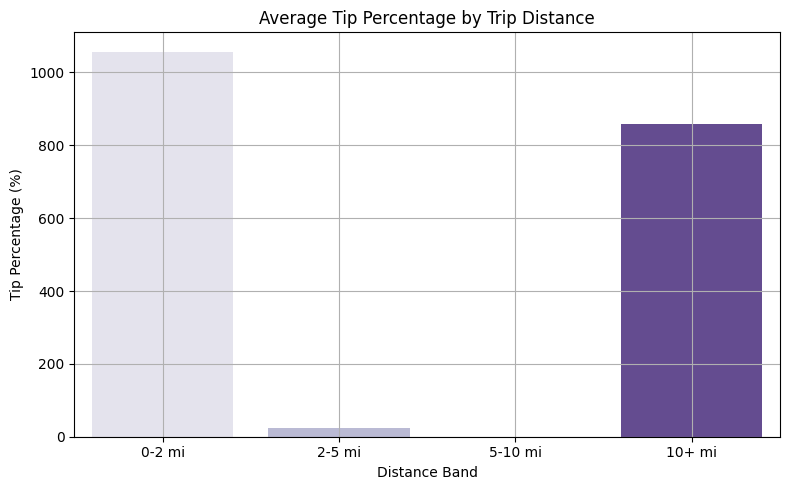

In [536]:
avg_tip_by_distance = df_tips.groupby('distance_band')['tip_percentage'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=avg_tip_by_distance, x='distance_band', y='tip_percentage', palette='Purples')
plt.title('Average Tip Percentage by Trip Distance')
plt.xlabel('Distance Band')
plt.ylabel('Tip Percentage (%)')
plt.tight_layout()
plt.grid(True)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [538]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Use only positive fare_amount and non-negative tip_amount
df_tips = pd.DataFrame()
df_tips = df1_cleaned[(df1_cleaned['fare_amount'] > 0) & (df1_cleaned['tip_amount'] >= 0)].copy()
df_tips['tip_percentage'] = (df_tips['tip_amount'] / df_tips['fare_amount']) * 100

# Label low and high tippers
df_tips['tip_level'] = pd.cut(
    df_tips['tip_percentage'],
    bins=[-1, 5, 20, 1000],
    labels=['Low Tip (<5%)', 'Moderate (5–20%)', 'High Tip (>20%)'])

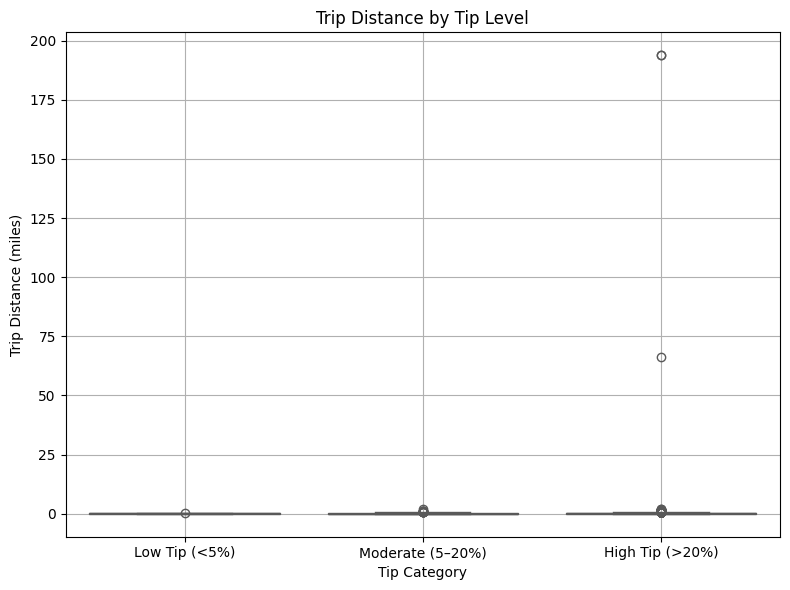

In [540]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_tips[df_tips['tip_level'].notna()], x='tip_level', y='trip_distance', palette='Set2')
plt.title("Trip Distance by Tip Level")
plt.ylabel("Trip Distance (miles)")
plt.xlabel("Tip Category")
plt.grid(True)
plt.tight_layout()
plt.show()

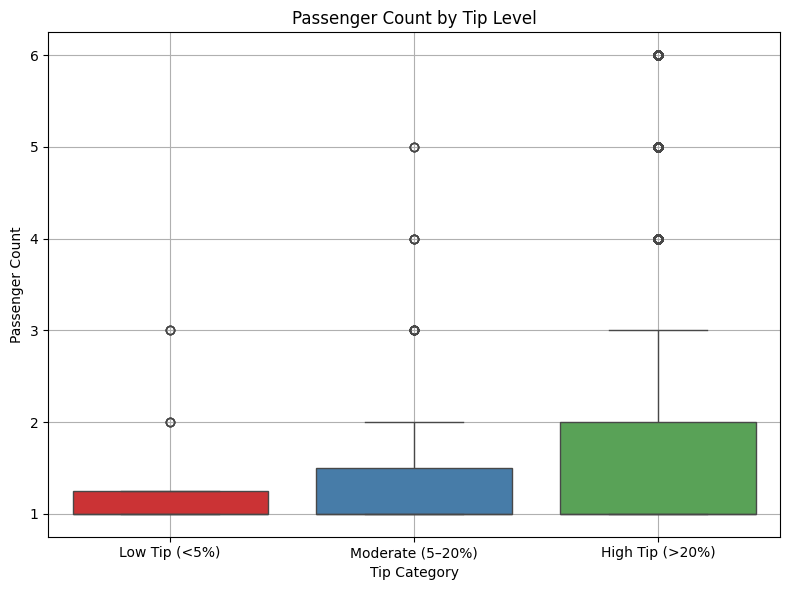

In [542]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_tips[df_tips['tip_level'].notna()], x='tip_level', y='passenger_count', palette='Set1')
plt.title("Passenger Count by Tip Level")
plt.ylabel("Passenger Count")
plt.xlabel("Tip Category")
plt.grid(True)
plt.tight_layout()
plt.show()

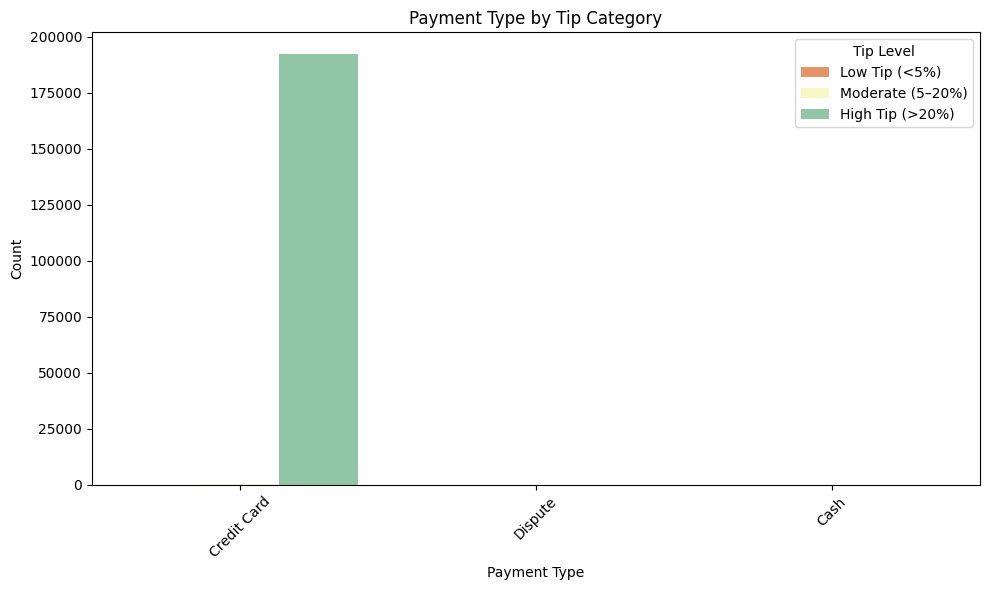

In [546]:
payment_map = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}
df_tips['payment_type_desc'] = df1_cleaned['payment_type'].map(payment_map)
plt.figure(figsize=(10,6))
sns.countplot(data=df_tips[df_tips['tip_level'].notna()], x='payment_type_desc', hue='tip_level', palette='Spectral')
plt.title("Payment Type by Tip Category")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.legend(title="Tip Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

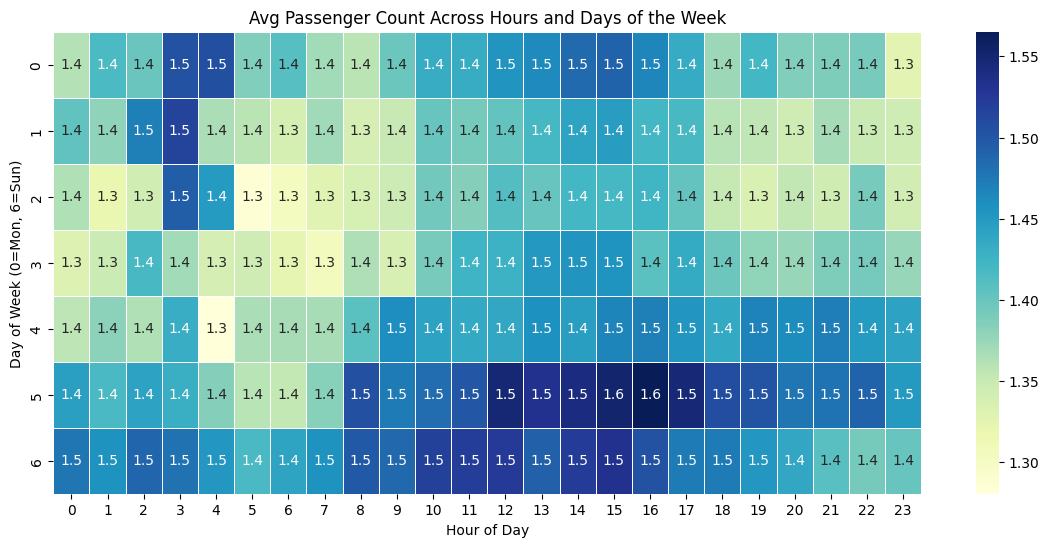

In [548]:
# See how passenger count varies across hours and days

# Extract hour and weekday
df1_cleaned['hour'] = df1_cleaned['tpep_pickup_datetime'].dt.hour
df1_cleaned['day_of_week'] = df1_cleaned['tpep_pickup_datetime'].dt.dayofweek  # Monday=0, Sunday=6

# Calculate average passenger count
passenger_hour_day = df1_cleaned.groupby(['day_of_week', 'hour'])['passenger_count'].mean().reset_index()

# Pivot to get a matrix form: days (rows) vs hours (columns)
pivot_data = passenger_hour_day.pivot(index='day_of_week', columns='hour', values='passenger_count')

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Avg Passenger Count Across Hours and Days of the Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Mon, 6=Sun)')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [554]:
# How does passenger count vary across zones

# Assuming df0 has trip data and zones_df has zone info with LocationID
df1_cleaned = df1_cleaned.merge(zones[['LocationID', 'zone']], how='left', left_on='PULocationID', right_on='LocationID')

#Calculate average and total passenger count per zone
zone_passenger_summary = df1_cleaned.groupby('zone')['passenger_count'].agg(['mean', 'sum', 'count']).reset_index()

# Sort zones by average passengers per trip
zone_passenger_summary = zone_passenger_summary.sort_values(by='mean', ascending=False)

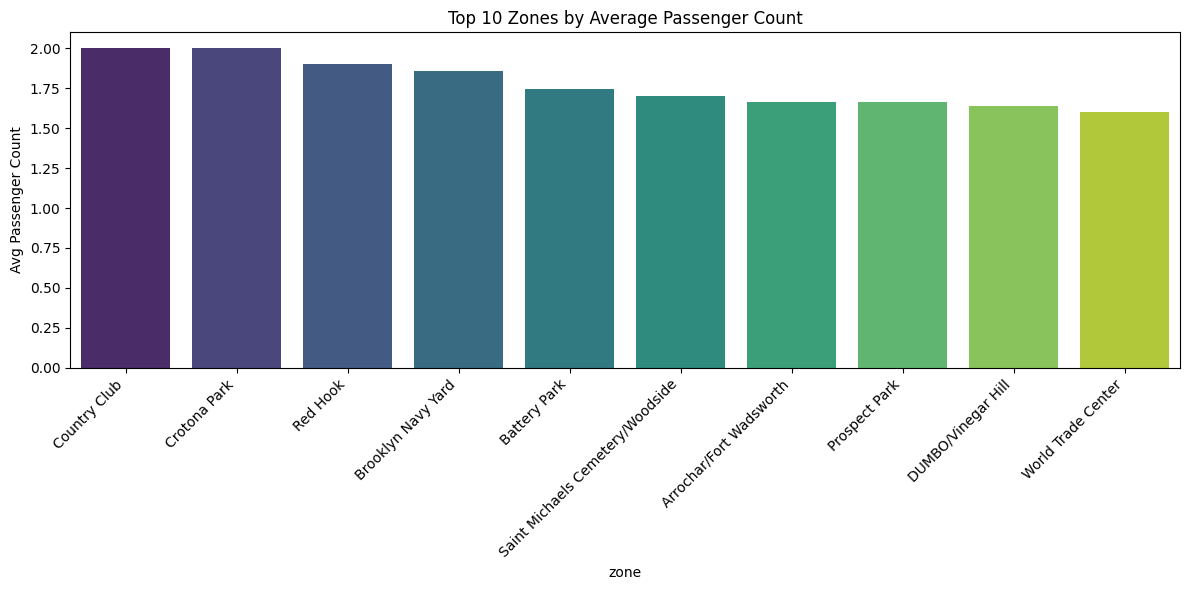

In [556]:
plt.figure(figsize=(12,6))
sns.barplot(data=zone_passenger_summary.head(10), x='zone', y='mean', palette='viridis')
plt.title('Top 10 Zones by Average Passenger Count')
plt.ylabel('Avg Passenger Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

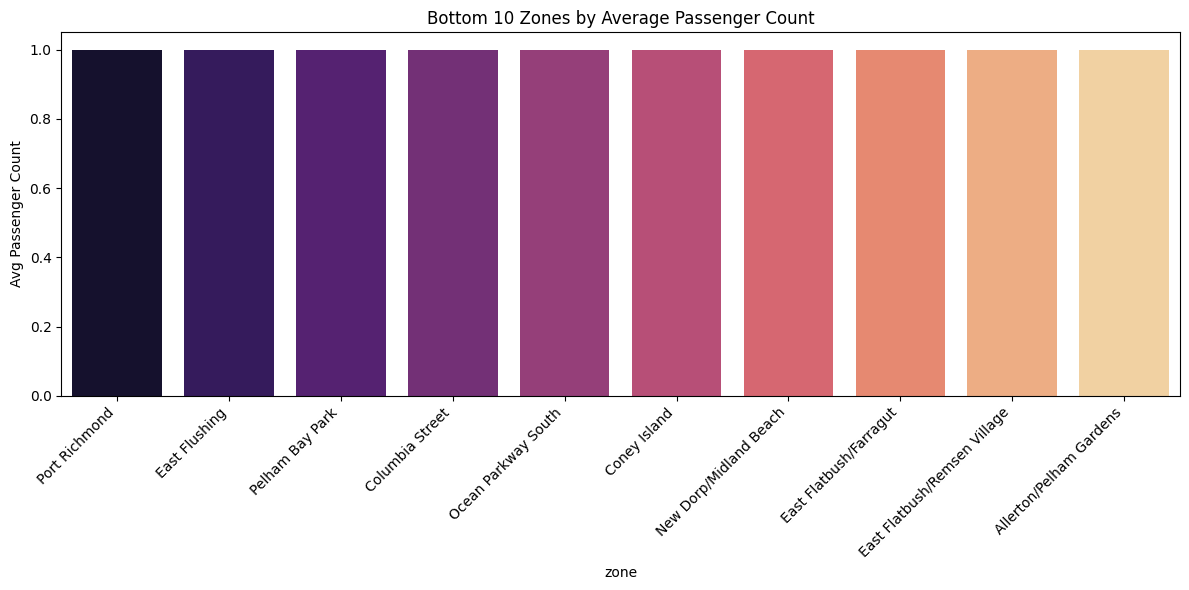

In [558]:
plt.figure(figsize=(12,6))
sns.barplot(data=zone_passenger_summary.tail(10), x='zone', y='mean', palette='magma')
plt.title('Bottom 10 Zones by Average Passenger Count')
plt.ylabel('Avg Passenger Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [560]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Calculate average passenger count grouped by zone
avg_passenger_by_zone = df1_cleaned.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)

# Merge the average passenger count into zones_with_trips GeoDataFrame
zones = zones.merge(avg_passenger_by_zone, how='left', left_on='LocationID', right_on='PULocationID')


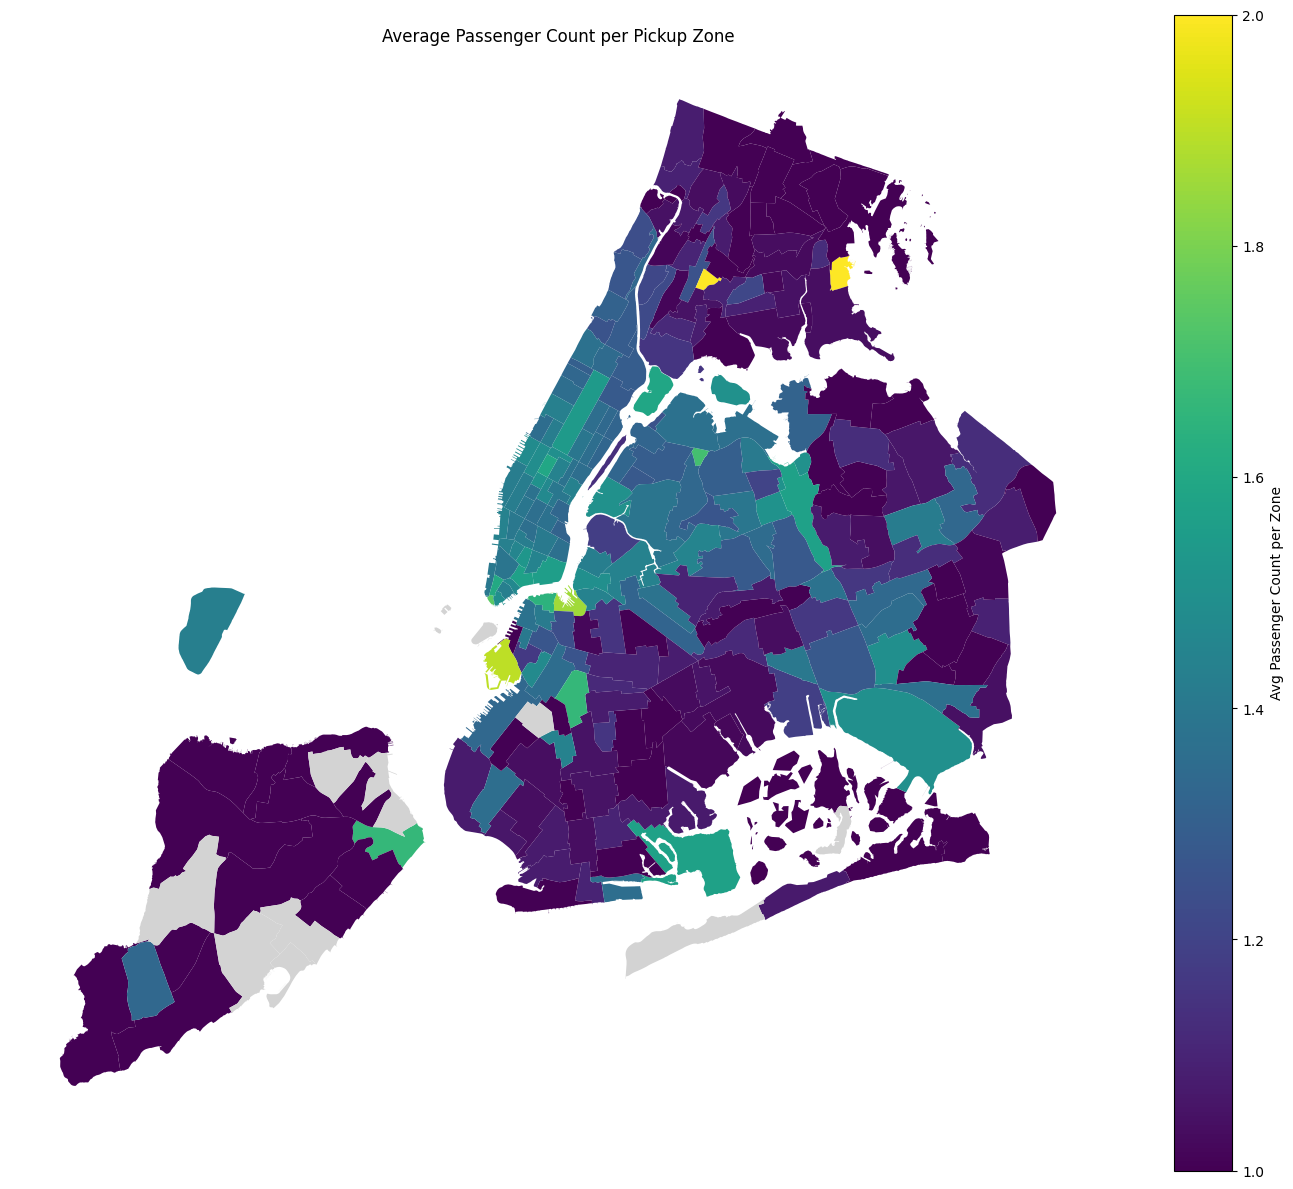

In [562]:
fig, ax = plt.subplots(1, 1, figsize=(14, 12))
zones.plot(
    column='avg_passenger_count',
    ax=ax,
    legend=True,
    cmap='viridis',
    legend_kwds={'label': "Avg Passenger Count per Zone", 'orientation': "vertical"},
    missing_kwds={"color": "lightgrey", "label": "No Data"}
)
ax.set_title("Average Passenger Count per Pickup Zone")
plt.axis('off')
plt.tight_layout()
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [566]:
# How often is each surcharge applied?
surcharge_cols = ['extra', 'mta_tax', 'congestion_surcharge', 'airport_fee']

for col in surcharge_cols:
    if col in df1_cleaned.columns:
        applied_count = (df1_cleaned[col] > 0).sum()
        total_count = len(df1_cleaned)
        print(f"{col}: applied {applied_count} times ({(applied_count / total_count) * 100:.2f}%)")


extra: applied 289768 times (67.06%)
mta_tax: applied 423002 times (97.89%)
congestion_surcharge: applied 345045 times (79.85%)


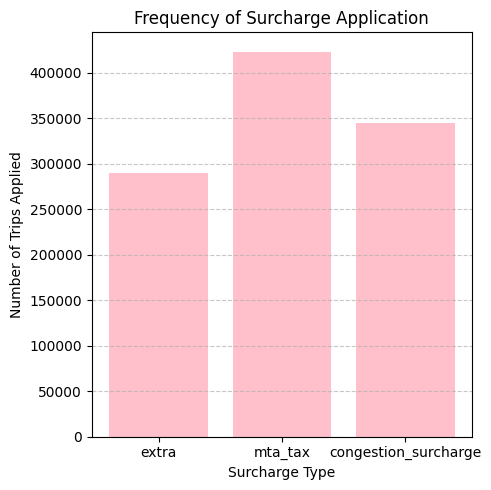

In [576]:
applied_freq = {}

for col in surcharge_cols:
    if col in df1_cleaned.columns:
        applied_freq[col] = (df1_cleaned[col] > 0).sum()

# Plot
plt.figure(figsize=(5, 5))
plt.bar(applied_freq.keys(), applied_freq.values(), color='pink')
plt.title("Frequency of Surcharge Application")
plt.ylabel("Number of Trips Applied")
plt.xlabel("Surcharge Type")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

##### Resonse as below:
###### To increase the optimize routing and dispatching based on demand patterns and operational inefficiencies
Add more taxis during busy hours
Focus on busy areas
Avoid slow routes
Raise the fare that is feasible to both Passengers and taxi drivers
Identify the areas which Zones have the busiest and increase the available of taxis in those zones for the busy hours.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

##### My Response: 

######  1. Hourly Trends: 
Availability of cabs during this peak hours '8 -18 hrs'.
######  2. Week Trends: 
Wednesdays and Thursdays demand is hgh, the availabilty of cabs at the main commercial and residential places will bring the trust of the passenger for minimal wait. 
Increase of during these two days can increase the total revenue.
######  3. Monthly Trends: 
High demand is observed during March - May & October- November. 
Fare amount for the miles can be validated, a increase in percentage share of trip amount is good to ensure the taxi drivers are available and increase the revenue.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

#### My Response: 
##### 1. Dynamic Pricing by Time of the Day
###### High-Demand Hours ('8 -18 hrs):
Apply slight fare surcharges (5–10%) during these periods to capture high willingness to pay.
Justify with faster dispatch and better availability.
######  Low-Demand Hours (12 AM – 4 AM):
Offer off-peak discounts or bundled incentives (e.g., ride credits for return trips) to boost utilization.

##### 2. Zone-Based Surcharge Adjustments
Identify high-traffic zones and frequent pickup/drop-off points:
Apply a zonal access fee (e.g., near airports or major tourist attractions).
Waive small surcharges in low-demand or underserved areas to encourage usage and increase coverage.

##### Distance-Based Fare Recalibration
Flatten fares for short trips to stay competitive with ride-hailing apps.

##### 4. Incentivize Tipping Through Pricing Transparency
Display suggested tip bands and average tips per distance/duration.
Consider lowering base fare slightly while encouraging tips, improving driver satisfaction and customer experience.

##### Conclusion:
Introduce loyalty tiers or prepaid bundles for frequent riders.
Maintain base fare within 5–10% of average competitor fare.
Emphasize transparent fixed pricing over dynamic surge when marketing.